In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import any other packages you may want to use


In [3]:
train_df = pd.read_csv("../Data/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
# your code here (optional)

print(f"The training data has {train_df.shape[1]} attribues for {train_df.shape[0]} passengers!") # printing the number of attributes and passengers

The training data has 21 attribues for 243787 passengers!


In [5]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [6]:
train_df.info() # printing the information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [7]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountAge,243787.0,NaN,NaN,NaN,60.083758,34.285143,1.0,30.0,60.0,90.0,119.0
MonthlyCharges,243787.0,NaN,NaN,NaN,12.490695,4.327615,4.990062,8.738543,12.495555,16.23816,19.989957
TotalCharges,243787.0,NaN,NaN,NaN,750.741017,523.073273,4.991154,329.147027,649.878487,1089.317362,2378.723844
SubscriptionType,243787,3,Standard,81920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,243787,4,Electronic check,61313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,243787,2,No,121980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ContentType,243787,3,Both,81737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiDeviceAccess,243787,2,No,122035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceRegistered,243787,4,Computer,61147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ViewingHoursPerWeek,243787.0,NaN,NaN,NaN,20.502179,11.243753,1.000065,10.763953,20.523116,30.219396,39.999723


In [8]:
continuous=['AccountAge','MonthlyCharges','TotalCharges','ViewingHoursPerWeek','AverageViewingDuration','ContentDownloadsPerMonth',
           'SupportTicketsPerMonth','WatchlistSize']
ordinal=['UserRating']
categorical=['SubscriptionType','PaymentMethod','PaperlessBilling','ContentType','MultiDeviceAccess','DeviceRegistered',
            'GenrePreference','Gender','ParentalControl','SubtitlesEnabled']
target=['Churn']

In [9]:
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):
    

    median = x[var].median()
    mean = x[var].mean()
    mode = x[var].mode()[0]
    max=x[var].max()

    # Plotting the distribution of age
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')

    # Adding title and axis labels
    plt.title("Distribution of "+ str(var), color='white',fontsize=16,fontdict={'fontname': 'monospace'})
    plt.xlabel(var, color='white',fontsize=12,fontdict={'fontname': 'monospace'})
    plt.ylabel("Frequency", color='white',fontsize=12,fontdict={'fontname': 'monospace'})

    fig.set_facecolor('black')  # Changing the background color
    ax.set_facecolor('black')  # Changing the plot area background color
    ax.grid(color='gray', alpha=0.25)  # Changing the grid lines color

    plt.axvline(mean, color='lime', linestyle='--', linewidth=2, label='Mean')  # Adding a vertical line for mean
    plt.text(mean, ax.get_ylim()[1]*0.9, f"Mean: {mean:.2f}", color='lime', fontsize=8, ha='left', va='center')  # Adding text for mean
    plt.axvline(median, color='cyan', linestyle='--', linewidth=2, label='Median')  # Adding a vertical line for median
    plt.text(median, ax.get_ylim()[1]*0.8, f"Median: {median:.2f}", color='cyan', fontsize=8, ha='left', va='center')  # Adding text for median
    plt.axvline(mode, color='yellow', linestyle='--', linewidth=2, label='Mode')  # Adding a vertical line for mode
    plt.text(mode, ax.get_ylim()[1]*0.95, f"Mode: {mode:.2f}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.5, f"Skew: {x[var].skew():.2f}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.45, f"Distribution: {skew_cat(x[var].skew())}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
    plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

    plt.setp(ax.spines.values(), color='gray') # Changing the color of the spines
    sns.despine()  # Removing the top and right spines
    plt.legend()  # Adding the legend
    plt.show()  # Displaying the plot

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


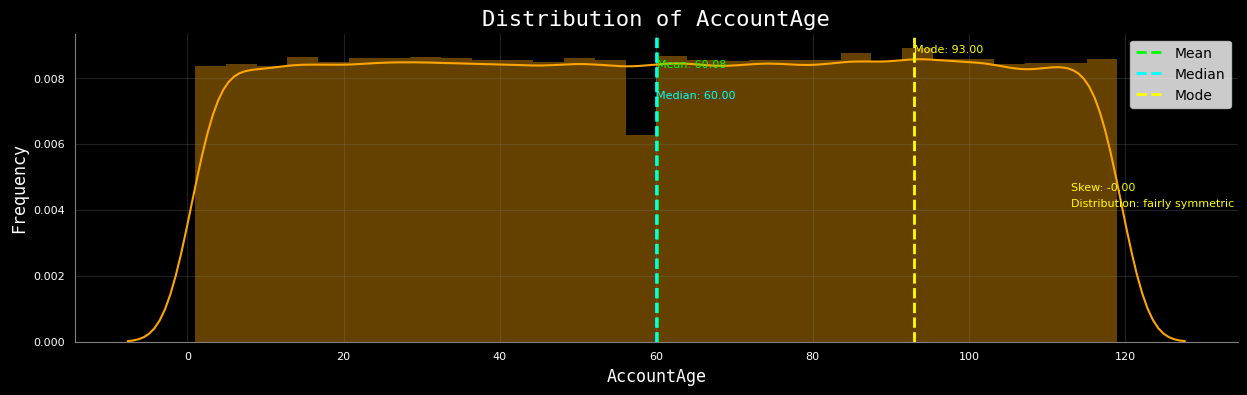

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


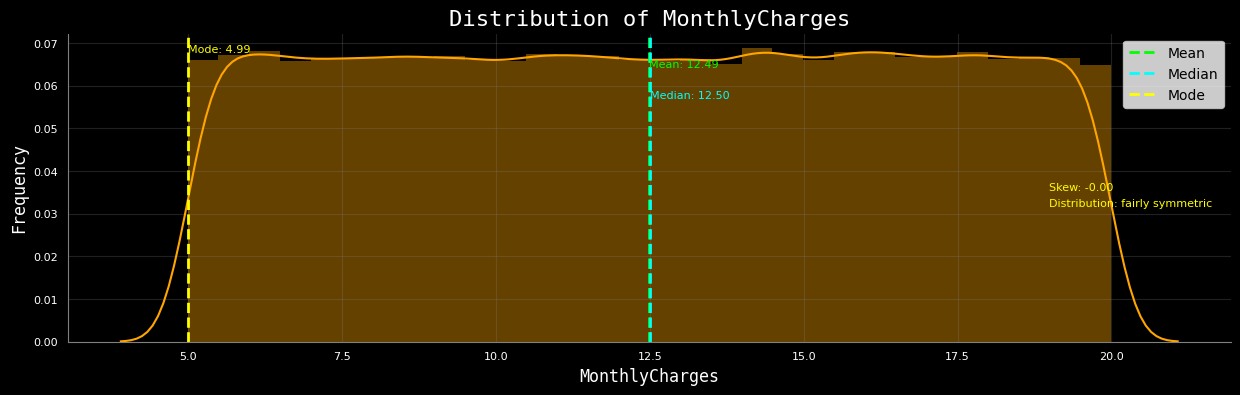

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


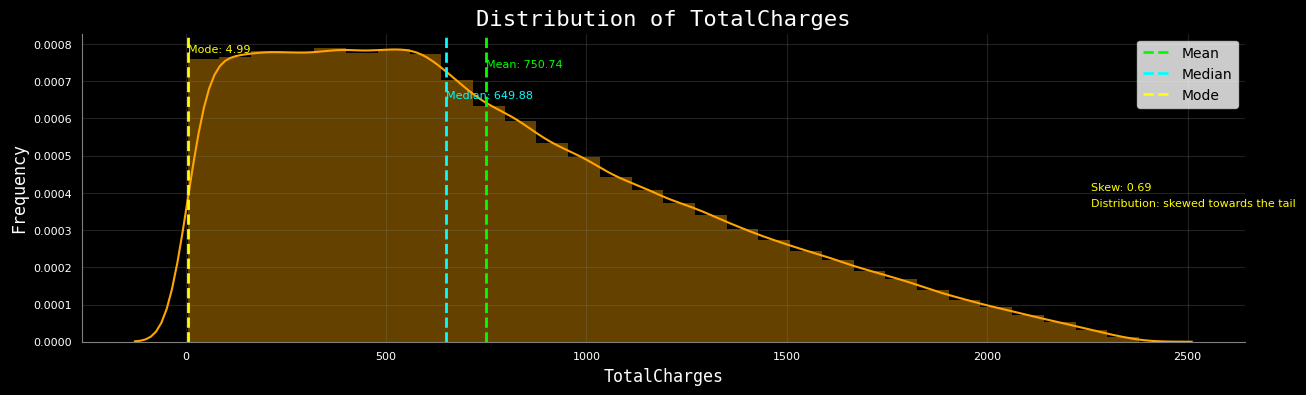

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


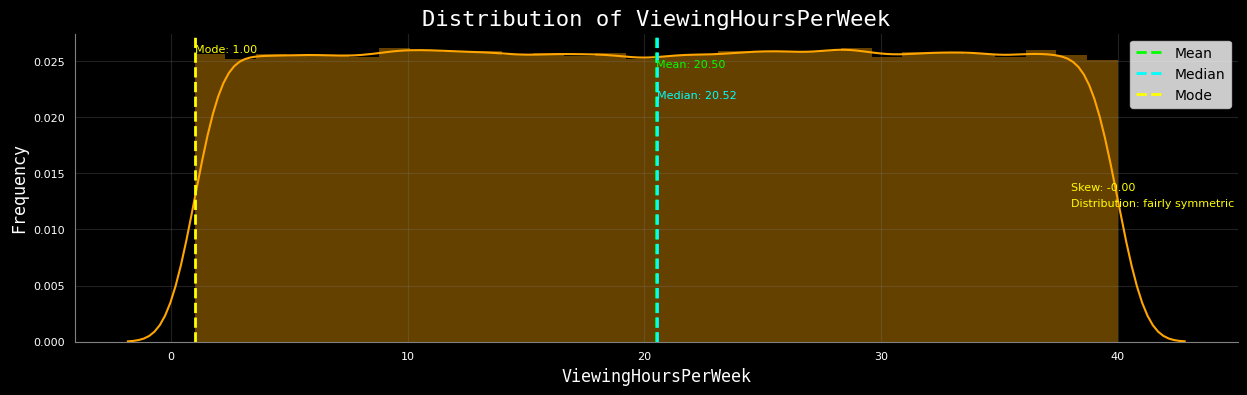

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


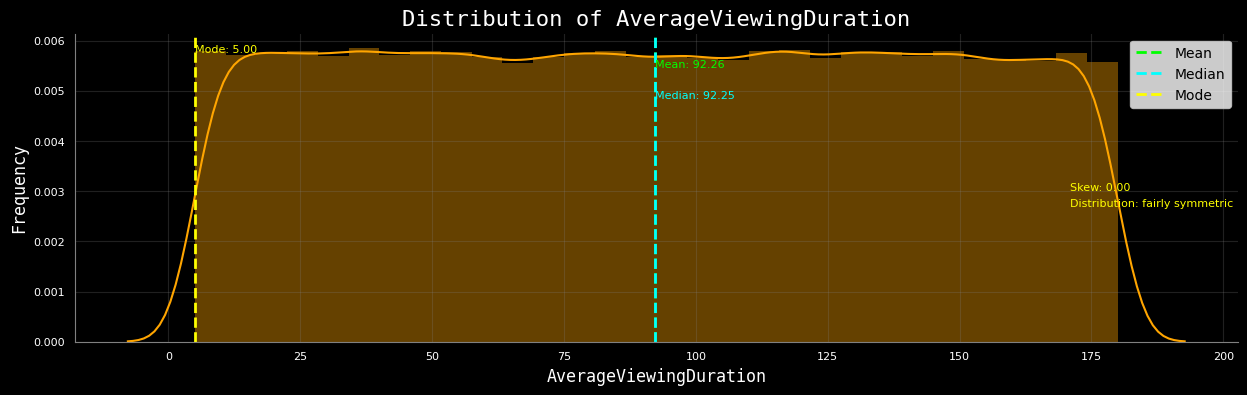

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


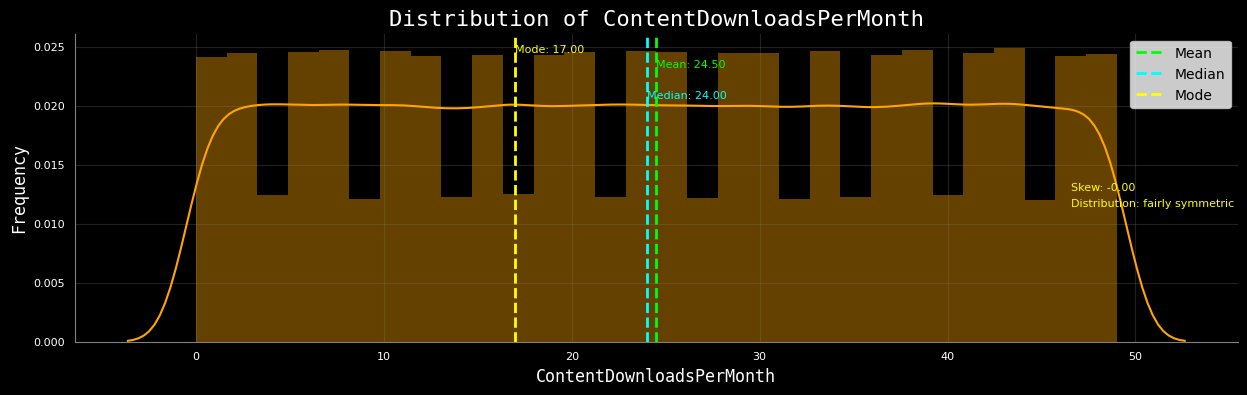

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


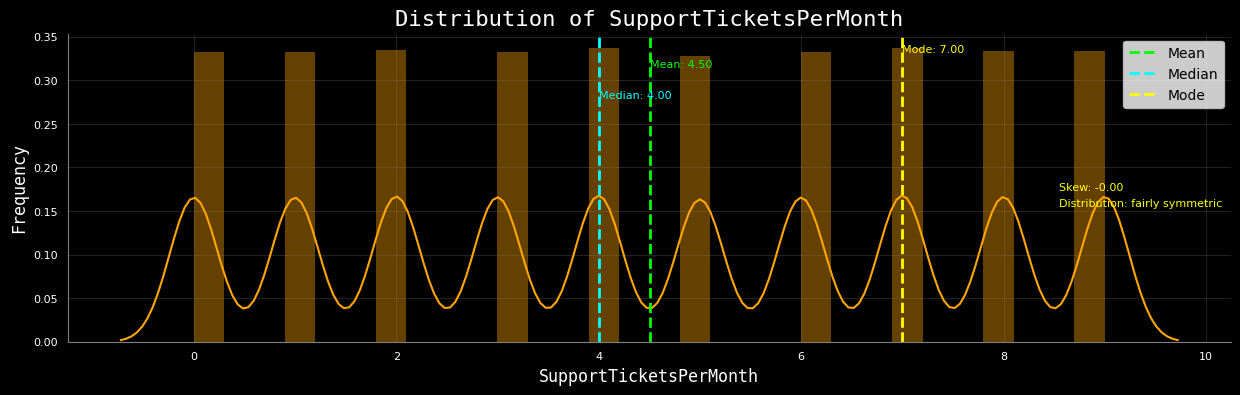

/var/folders/kz/0m0zvdwn54798h3cfz47bcjw0000gn/T/ipykernel_97057/3391309025.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')


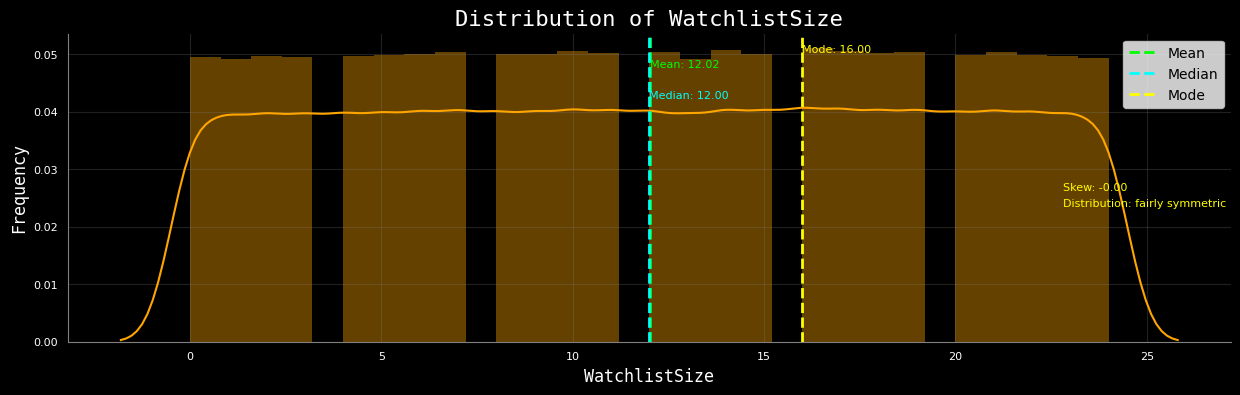

[None, None, None, None, None, None, None, None]

In [10]:
[skew_chart(train_df,i) for i in continuous]

In [11]:
import scipy.stats as stats

def plot_boxplot_with_outliers(data, variable):
    # Create a figure with black background
    fig, ax = plt.subplots(facecolor='black')

    # Set the facecolor of the axes to black
    ax.set_facecolor('black')

    # Set the style and color palette for Seaborn
    sns.set(style='dark', palette='Oranges')

    # Create the boxplot
    sns.boxplot(data=data[variable], color='orange', ax=ax)

    # Calculate the Z-scores
    z_scores = stats.zscore(data[variable])

    # Define the threshold for outlier detection
    z_score_threshold = 3

    # Count the number of outliers
    outliers = data[(z_scores) > z_score_threshold]
    num_outliers_up = len(outliers)
    outliers = data[(z_scores) < -z_score_threshold]
    num_outliers_low = len(outliers)

    # Annotate the number of outliers
    ax.annotate(f'Outliers (+3 SD): {num_outliers_up}', xy=(0.5, 0.95), xycoords='axes fraction',
                 ha='center', va='top', color='white', fontsize=8)
    
    ax.annotate(f'Outliers (-3 SD): {num_outliers_low}', xy=(0.5, 0.05), xycoords='axes fraction',
                 ha='center', va='top', color='white', fontsize=8)

    # Annotate the median value
    median = data[variable].median()
    ax.annotate(f'Median: {median}', xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center', color='white', fontsize=8)

    # Annotate the upper end of the box
    upper_end = data[variable].quantile(0.75)
    ax.annotate(f'Upper End: {upper_end}', xy=(0.5, 0.75), xycoords='axes fraction',
                ha='center', va='center', color='white', fontsize=8)

    # Annotate the lower end of the box
    lower_end = data[variable].quantile(0.25)
    ax.annotate(f'Lower End: {lower_end}', xy=(0.5, 0.25), xycoords='axes fraction',
                ha='center', va='center', color='white', fontsize=8)

    # Remove gridlines
    ax.grid(False)

    # Set the title
    ax.set_title(f'Boxplot of {variable}', color='white', fontsize=12, fontdict={'fontname': 'monospace'})

    # Set the labels
    ax.set_xlabel('Variable', color='white', fontsize=12, fontdict={'fontname': 'monospace'})
    ax.set_ylabel('Values', color='white', fontsize=12, fontdict={'fontname': 'monospace'})

    # Show the plot
    plt.show()

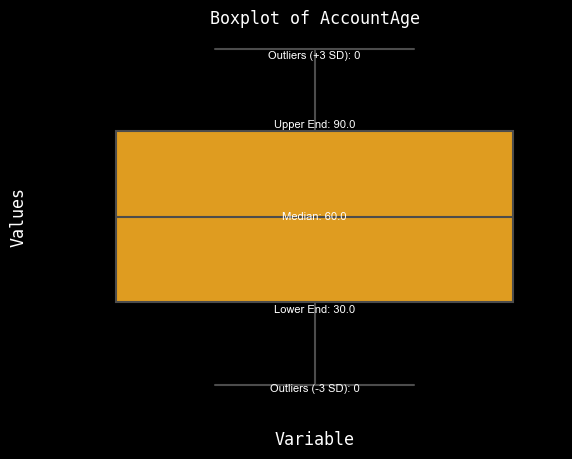

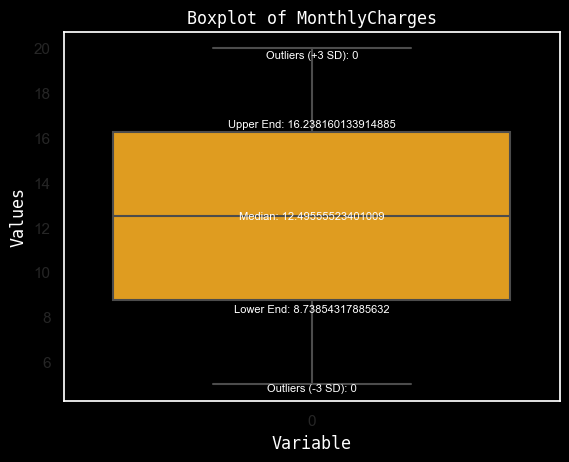

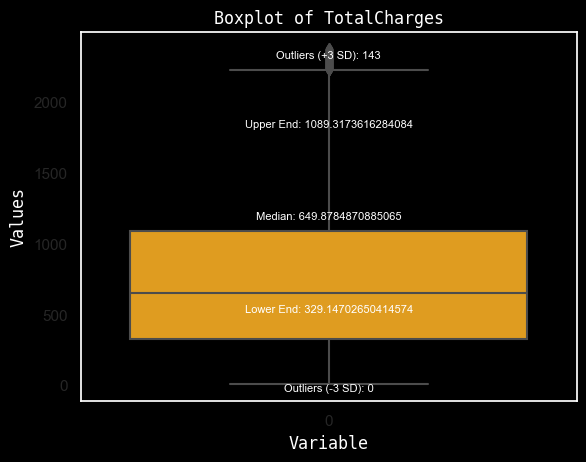

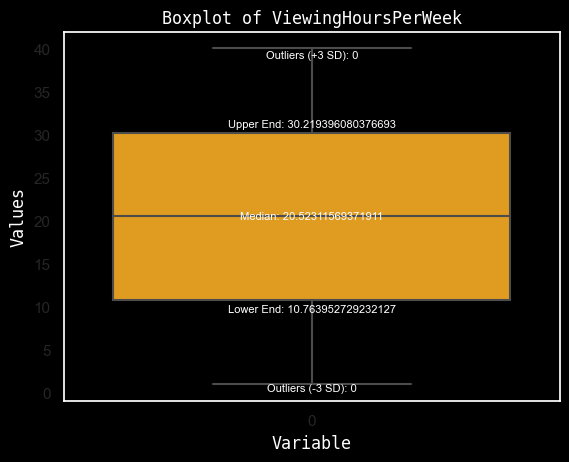

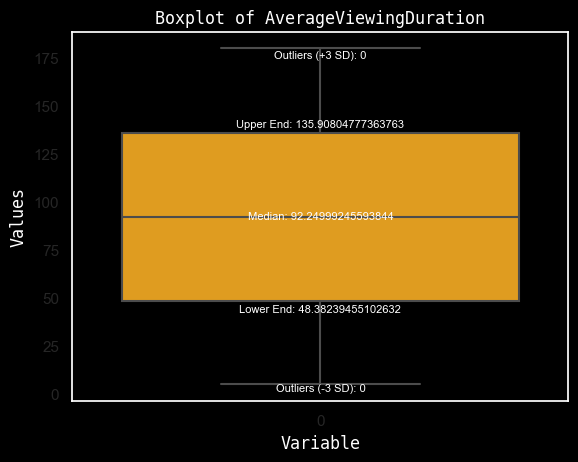

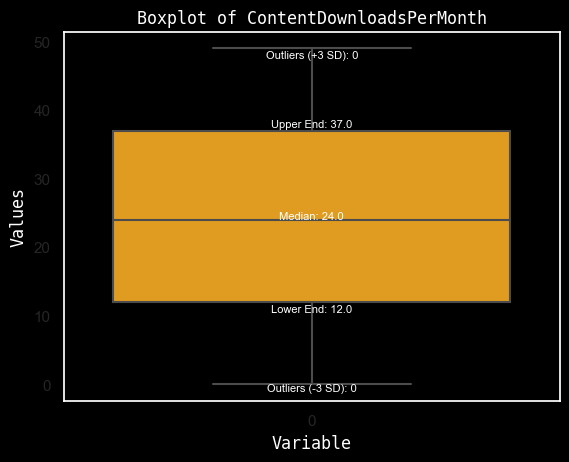

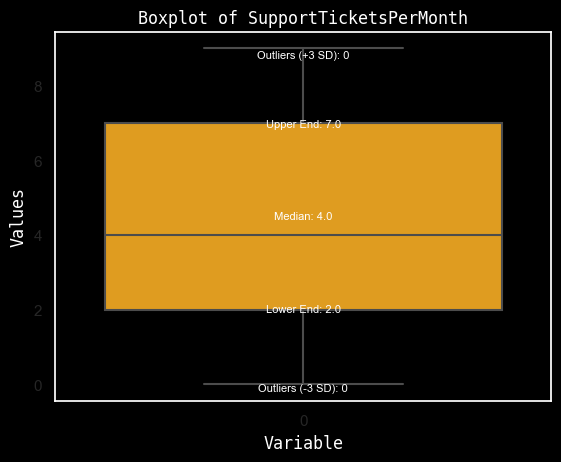

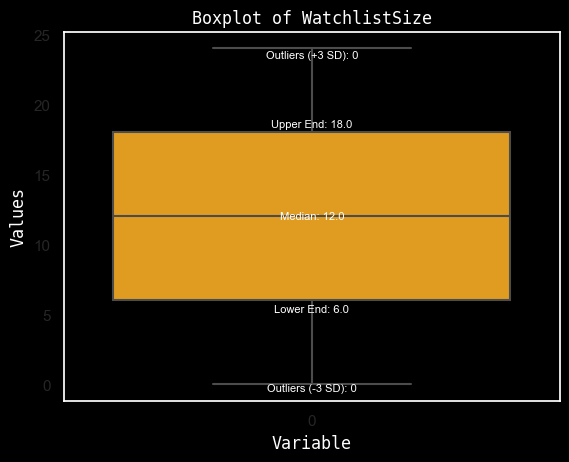

[None, None, None, None, None, None, None, None]

In [12]:
[plot_boxplot_with_outliers(train_df,i) for i in continuous]

In [13]:
def cnt_plot(x,var):    
    fig, ax = plt.subplots(figsize=(15, 4)) # Creating a figure and an axes

    
    total = len(x)
    value_counts = pd.Series(x[var]).value_counts().sort_values()
    percentages = value_counts / total * 100
    category_order = value_counts.index

    sns.countplot(x=var, data=x, order=category_order, palette='Set1')  # Plotting the count plot for Survived attribute


    plt.title("Count of "+str(var), color='white',fontsize=16,fontdict={'fontname': 'monospace'})
    plt.xlabel(var, color='white',fontsize=12,fontdict={'fontname': 'monospace'})
    plt.ylabel("Frequency", color='white',fontsize=12,fontdict={'fontname': 'monospace'})

    fig.set_facecolor('black')  # Changing the background color
    ax.set_facecolor('black')  # Changing the plot area background color
    ax.grid(color='gray', alpha=0.25)  # Changing the grid lines color

    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

    x=0
    for i in percentages.index:
        count = value_counts[i]
        ax.text(x, count+10, f"{percentages[i]:.1f}%", color='white', ha='center')
        x+=1

    plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
    plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

[None, None, None, None, None, None, None, None, None, None]

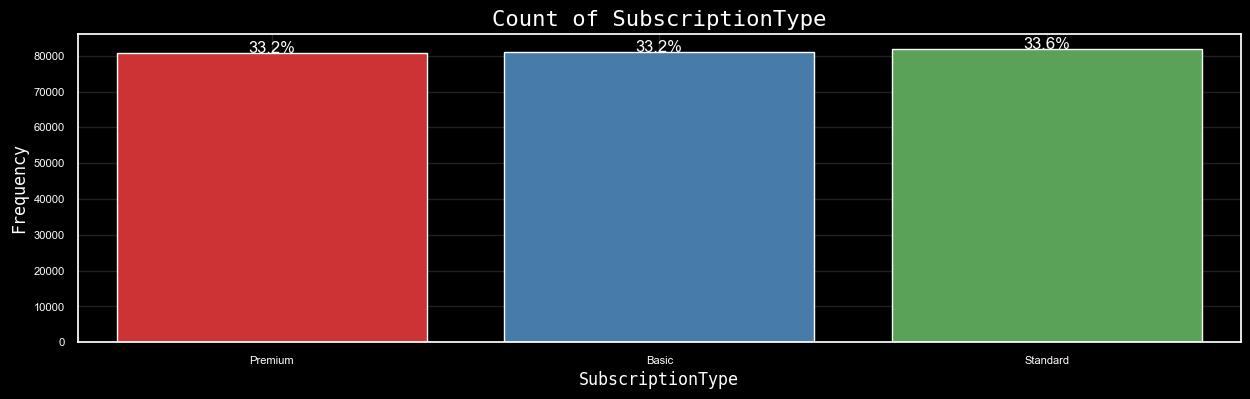

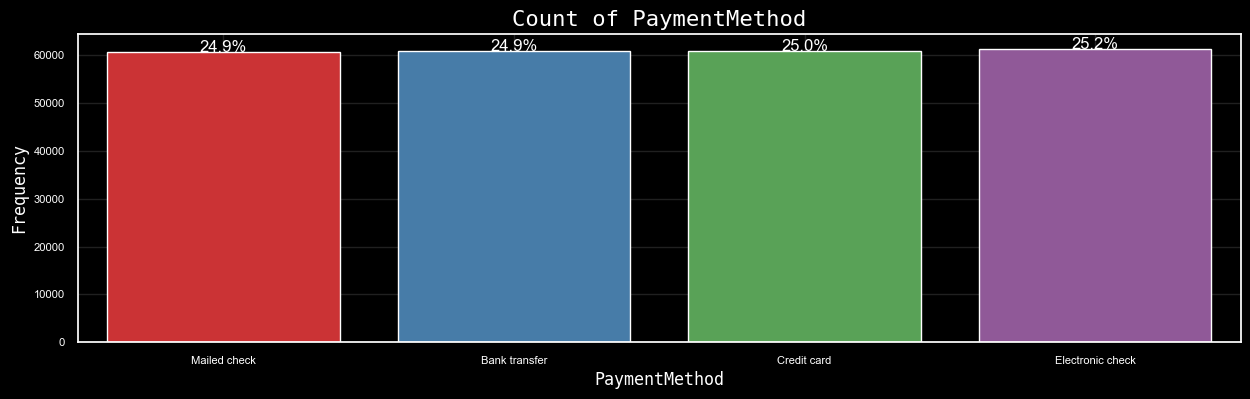

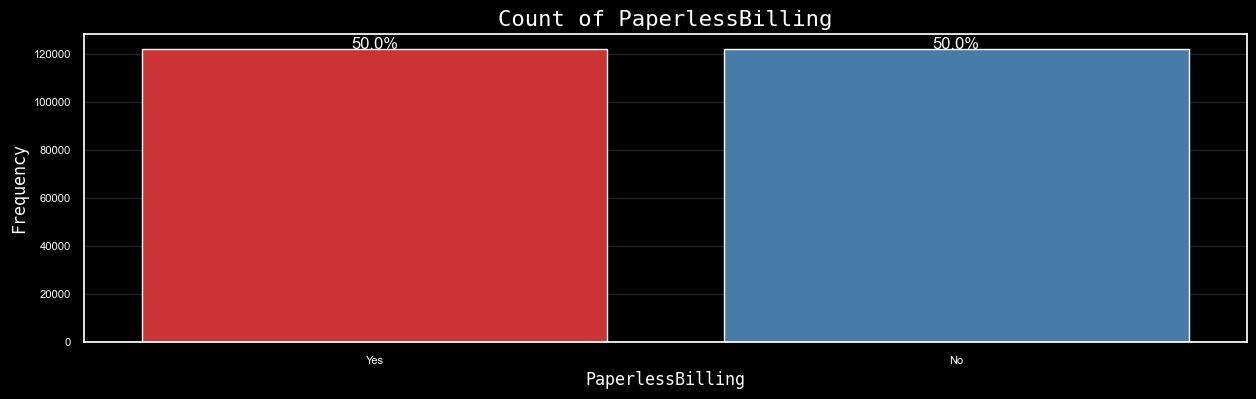

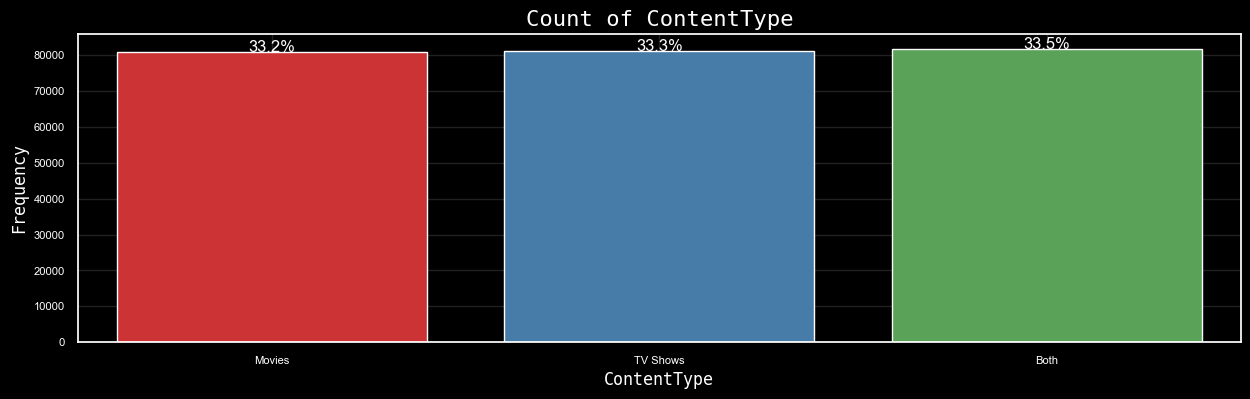

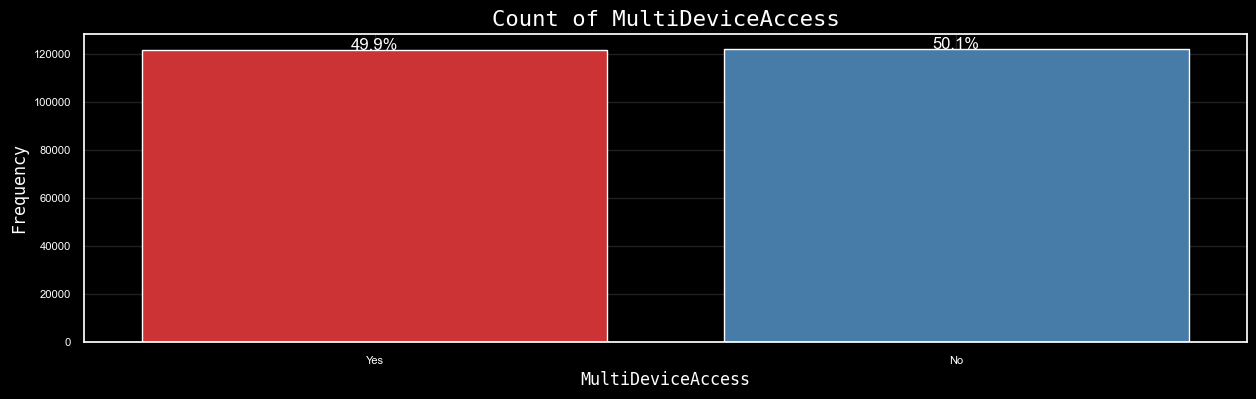

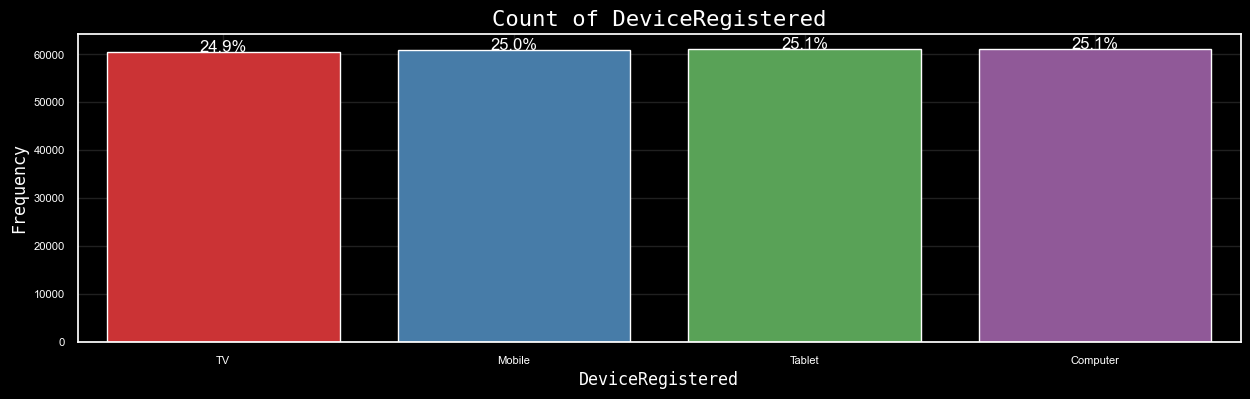

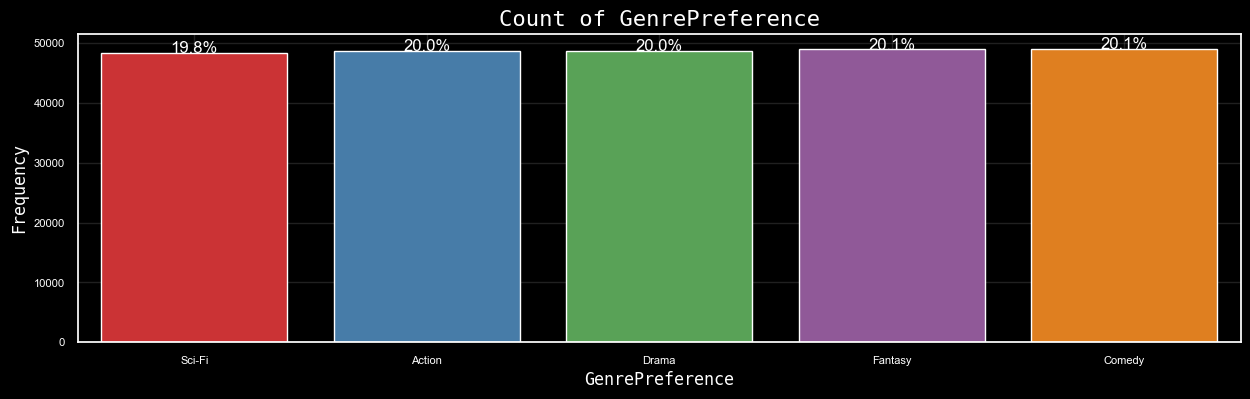

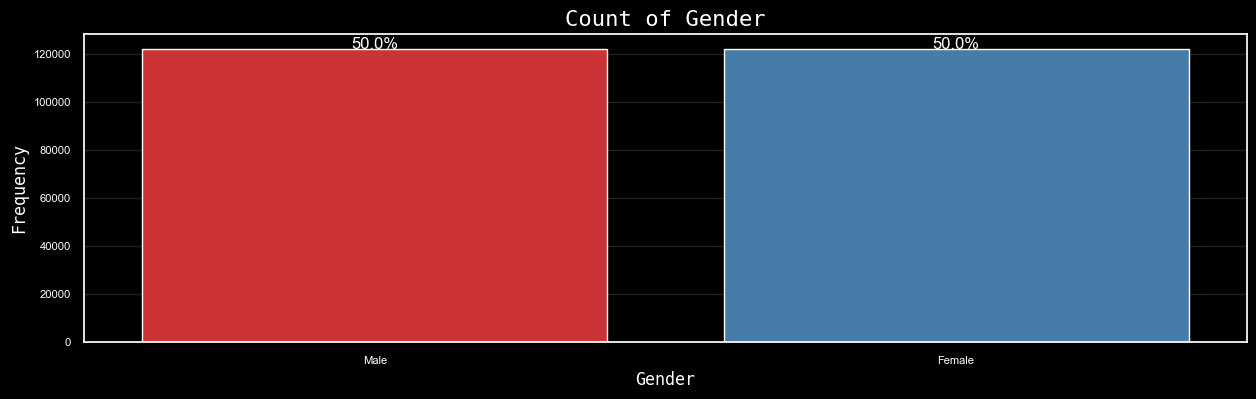

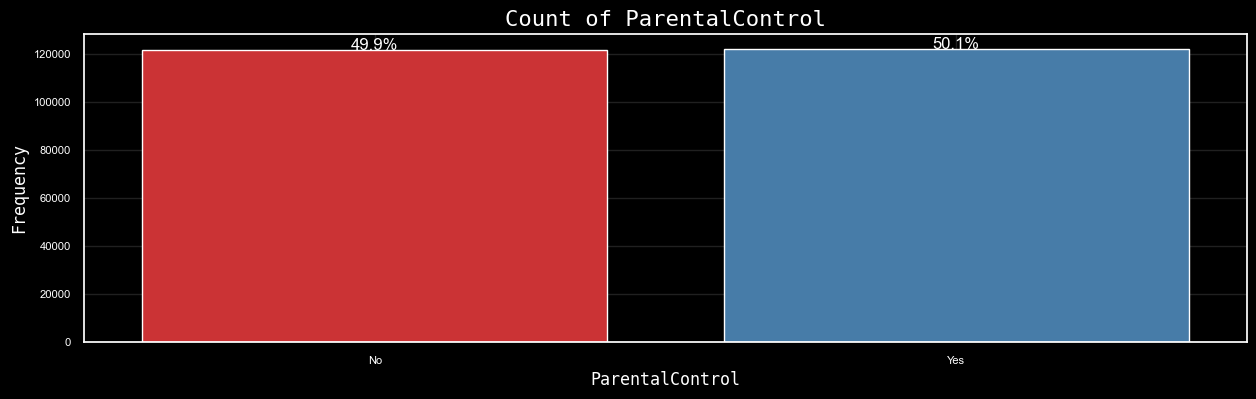

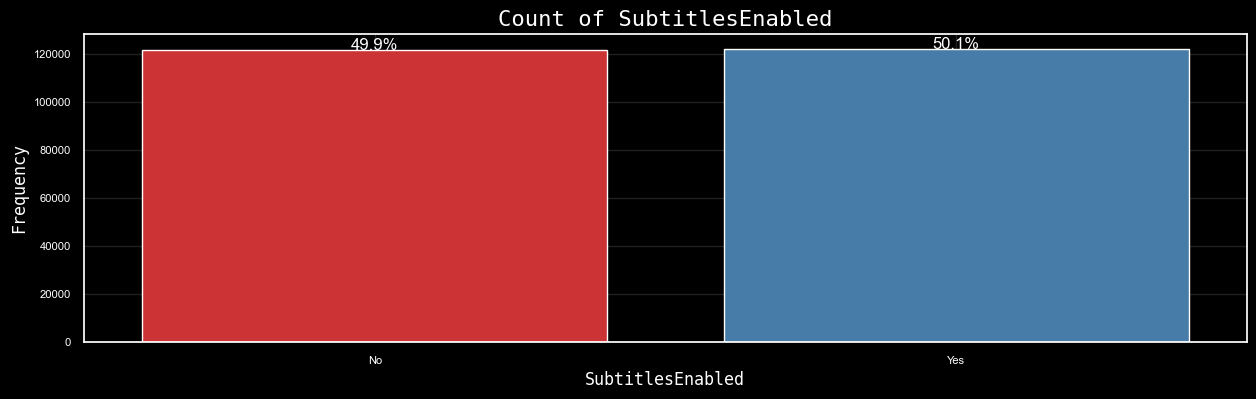

In [14]:
[cnt_plot(train_df,i) for i in categorical]

In [15]:
from scipy.stats import ttest_ind

def plot_continuous_vs_categorical(data, continuous_var, categorical_var):
    # Create a figure with black background
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')

    # Set the facecolor of the axes to black
    for ax in axes:
        ax.set_facecolor('black')

    # Set the style and color palette for Seaborn
    sns.set(style='dark', palette='Oranges')

    # Box plot
    sns.boxplot(x=categorical_var, y=continuous_var, data=data, ax=axes[0])
    axes[0].set_title(f'Box Plot - {continuous_var}', color='white', fontsize=16, fontdict={'fontname': 'monospace'})
    axes[0].set_xlabel(categorical_var, color='white', fontsize=12, fontdict={'fontname': 'monospace'})
    axes[0].set_ylabel(continuous_var, color='white', fontsize=12, fontdict={'fontname': 'monospace'})

    # Violin plot
    sns.violinplot(x=categorical_var, y=continuous_var, data=data, ax=axes[1])
    axes[1].set_title(f'Violin Plot - {continuous_var}', color='white', fontsize=16, fontdict={'fontname': 'monospace'})
    axes[1].set_xlabel(categorical_var, color='white', fontsize=12, fontdict={'fontname': 'monospace'})
    axes[1].set_ylabel(continuous_var, color='white', fontsize=12, fontdict={'fontname': 'monospace'})

    # Calculate mean values
    means = data.groupby(categorical_var)[continuous_var].mean()

    # Annotate mean values
    for i, cat in enumerate(data[categorical_var].unique()):
        mean_value = means[cat]
        axes[0].annotate(f'Mean: {mean_value:.2f}', xy=(i, mean_value), xytext=(i, mean_value + 2),
                         ha='center', va='bottom', color='white')
        axes[1].annotate(f'Mean: {mean_value:.2f}', xy=(i, mean_value), xytext=(i, mean_value + 2),
                         ha='center', va='bottom', color='white')

    # Perform statistical test (t-test)
    category1 = data[data[categorical_var] == data[categorical_var].unique()[0]][continuous_var]
    category2 = data[data[categorical_var] == data[categorical_var].unique()[1]][continuous_var]
    t_statistic, p_value = ttest_ind(category1, category2)

    # Determine if there is a significant difference
    if p_value < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'

    # Add statistical test results
    axes[0].annotate(f'{significance}\np-value: {p_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction',
                     ha='center', va='top', color='white')
    axes[1].annotate(f'{significance}\np-value: {p_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction',
                     ha='center', va='top', color='white')

    

    # Show the plot
    
    plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
    plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks
    plt.tight_layout()
    plt.show()



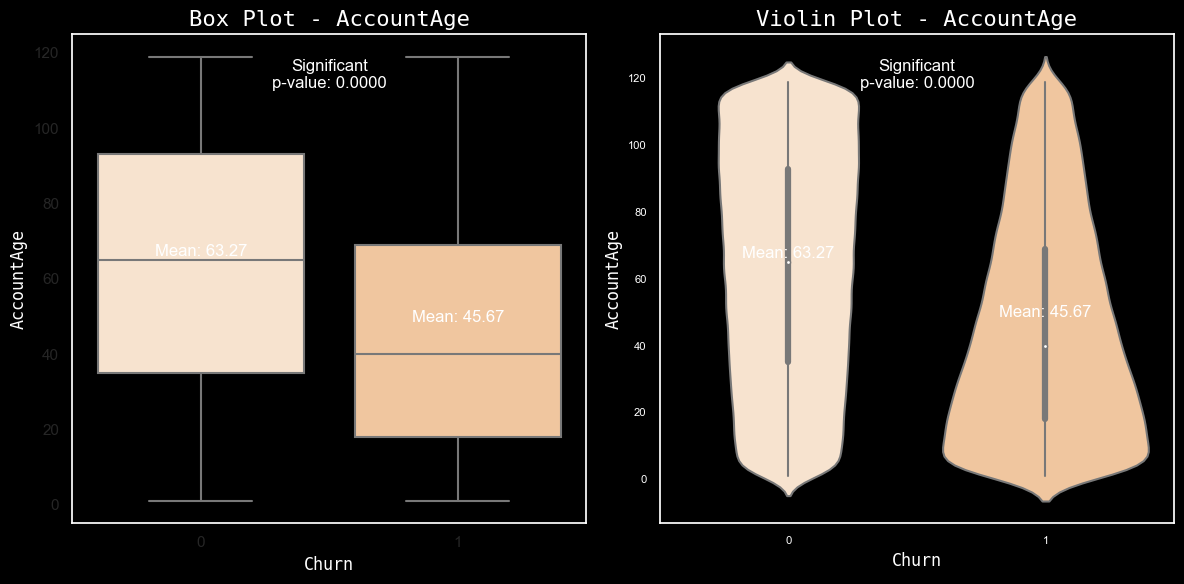

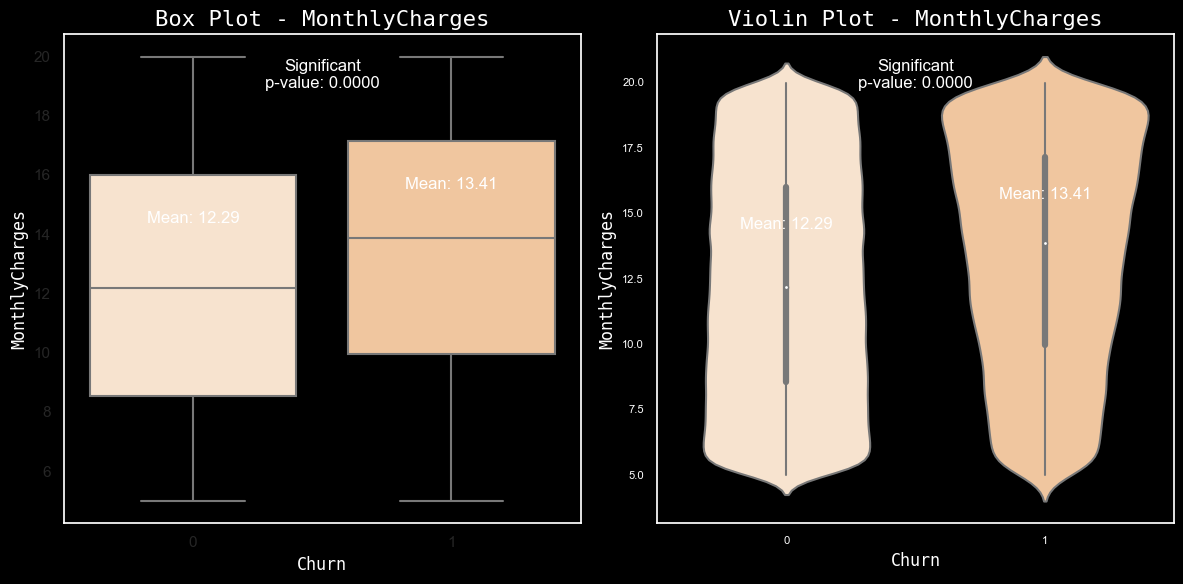

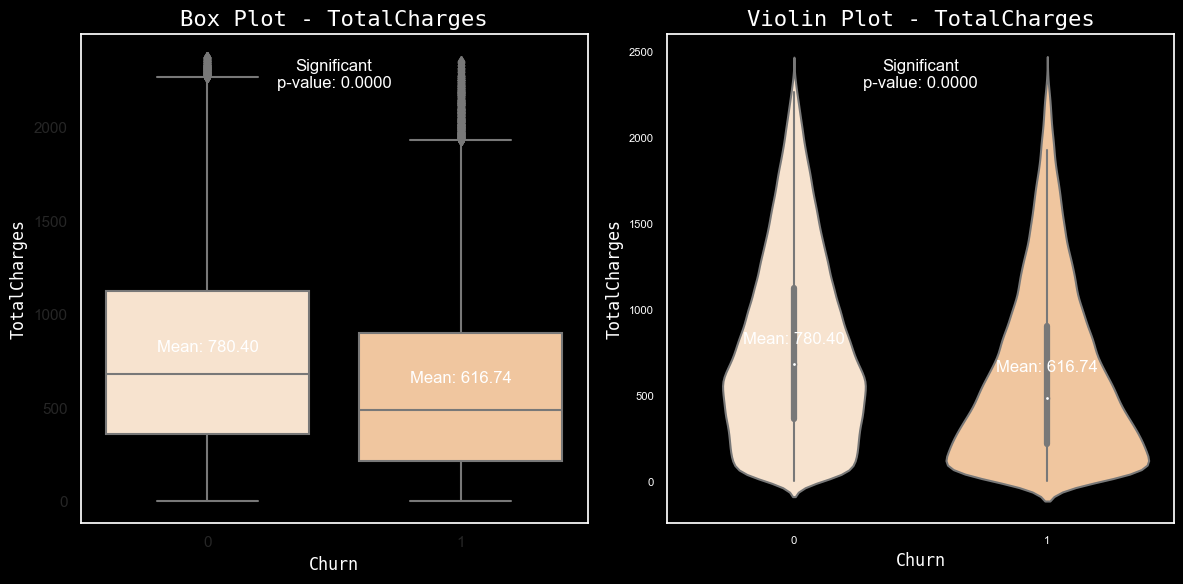

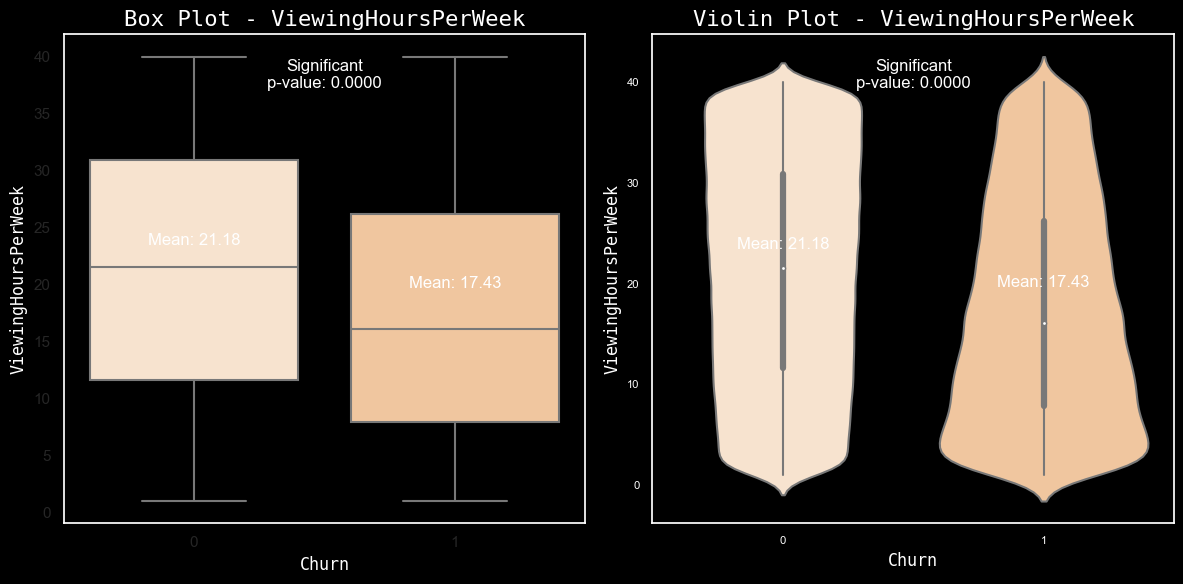

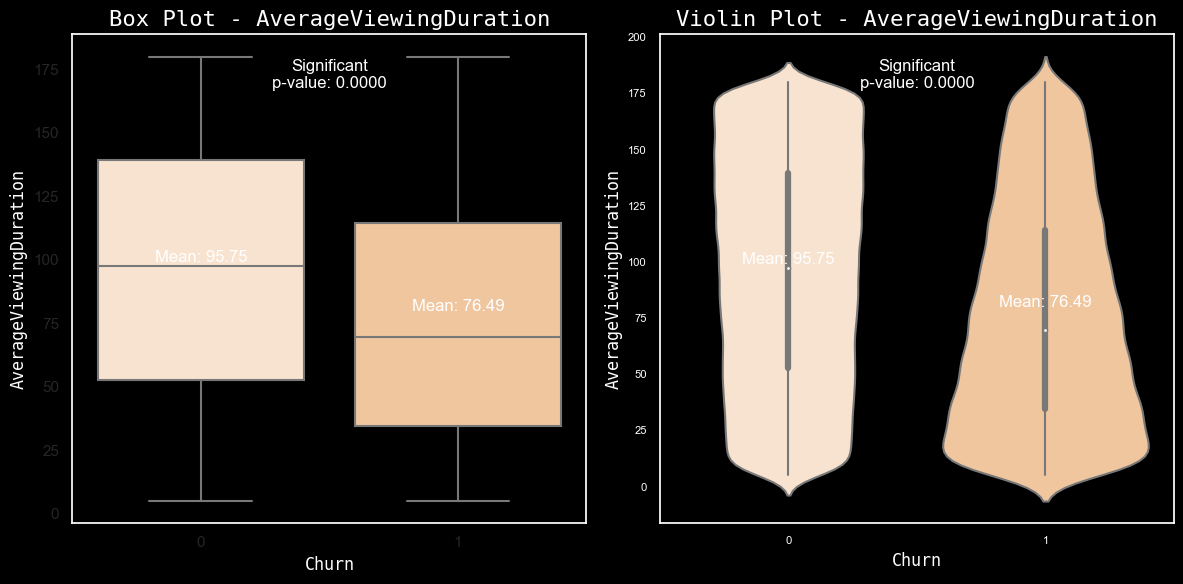

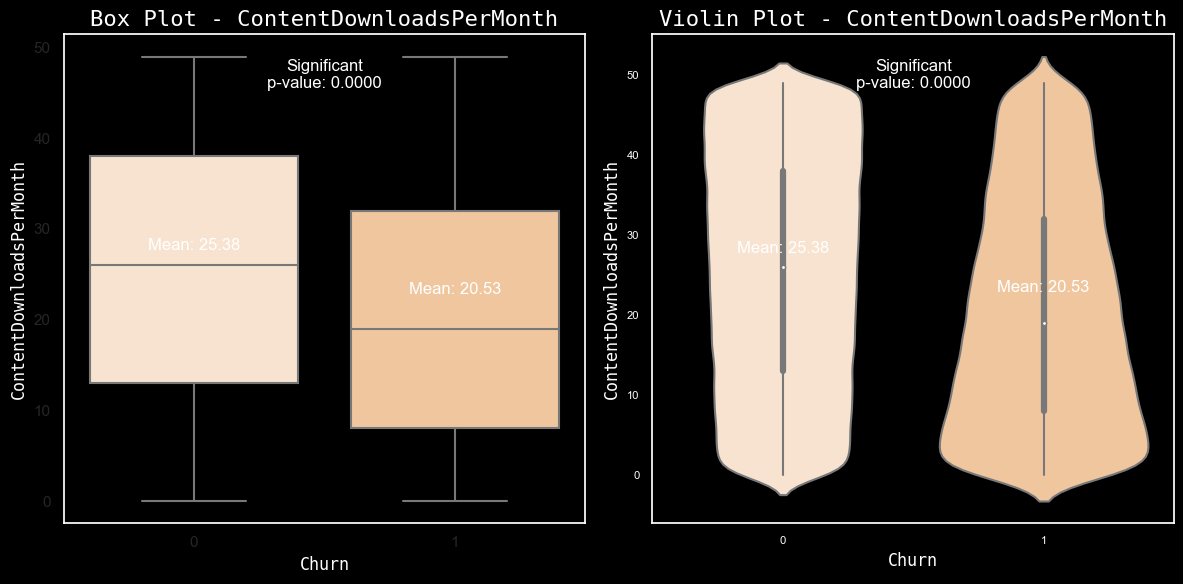

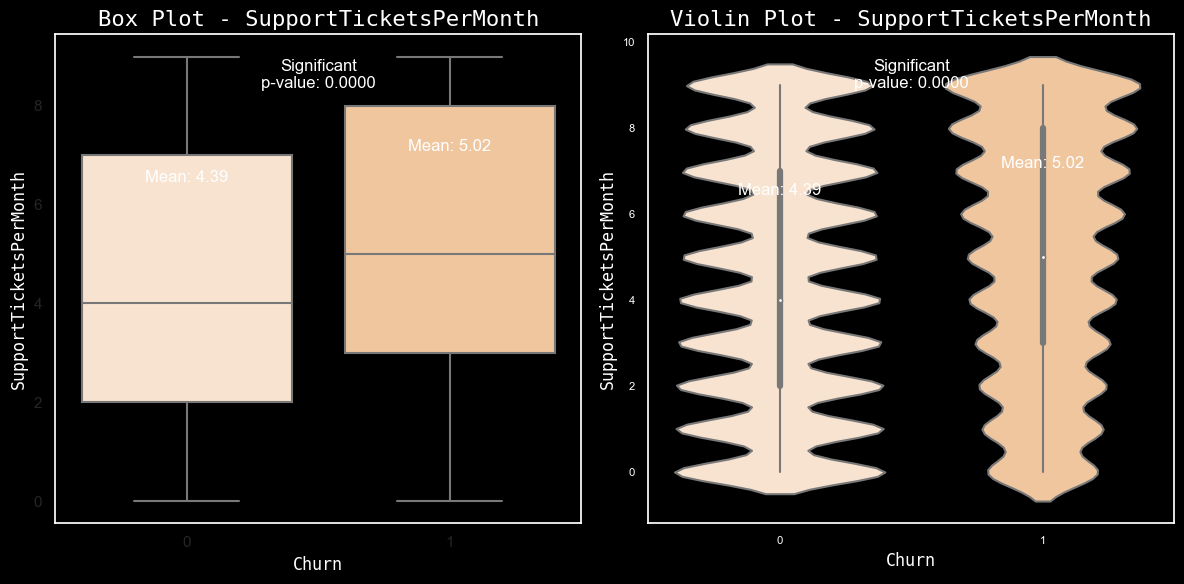

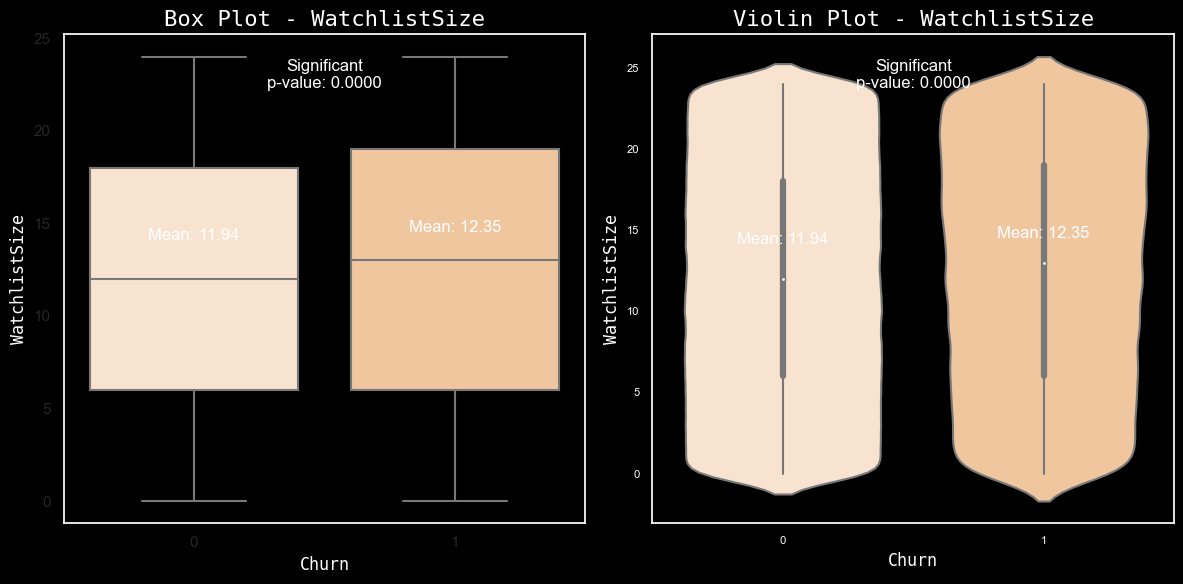

[None, None, None, None, None, None, None, None]

In [16]:
[plot_continuous_vs_categorical(train_df,i,'Churn') for i in continuous]

In [17]:
from scipy.stats import chi2_contingency

def plot_categorical_vs_categorical(data, variable1, variable2):
    # Create a figure with black background
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')

    # Set the facecolor of the axes to black
    for ax in axes:
        ax.set_facecolor('black')

    # Set the style and color palette for Seaborn
    sns.set(style='dark', palette='Oranges')

    # Bar plot
    sns.countplot(x=variable1, hue=variable2, data=data, ax=axes[0])
    axes[0].set_title(f'Bar Plot - {variable1} vs {variable2}', color='white', fontsize=16,)
    axes[0].set_xlabel(variable1, color='white', fontsize=12)
    axes[0].set_ylabel('Count', color='white', fontsize=12)

    plt.xticks(color='white', fontsize=8) # Changing the font size of x-axis ticks
    plt.yticks(color='white', fontsize=8) # Changing the font size of y-axis ticks

    # Calculate the contingency table
    contingency_table = pd.crosstab(data[variable1], data[variable2])

    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Determine if there is a significant association
    if p_value < 0.05:
        association = 'Significant'
    else:
        association = 'Not Significant'

    # Add chi-square test results
    axes[0].annotate(f'{association}\np-value: {p_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction',
                     ha='center', va='top', color='white')

    # Hide y-axis labels for better visualization
    axes[0].set_yticklabels([])

    # Normalize the count for better comparison
    normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    # Stacked bar plot
    normalized_table.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title('Stacked Bar Plot', color='white', fontsize=16)
    axes[1].set_xlabel(variable1, color='white', fontsize=12)
    axes[1].set_ylabel('Proportion', color='white', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Formatted output of contingency table
    print("Contingency Table:\n")
    print(contingency_table)
    print("\n")

    # Normalized contingency table with percentages
    print("Normalized Contingency Table (in %):\n")
    normalized_table_percent = normalized_table.applymap(lambda x: f'{x*100:.2f}%')
    print(normalized_table_percent)

    # Calculate Information Value (IV)
    num_rows = contingency_table.shape[0]
    num_cols = contingency_table.shape[1]
    total_count = contingency_table.sum().sum()
    iv = 0

    for i in range(num_rows):
        for j in range(num_cols):
            expected_count = (contingency_table.iloc[i, :].sum() * contingency_table.iloc[:, j].sum()) / total_count
            if expected_count != 0:
                iv += (contingency_table.iloc[i, j] / total_count) * np.log(
                    contingency_table.iloc[i, j] / expected_count)

    print("\nInformation Value (IV):", iv)

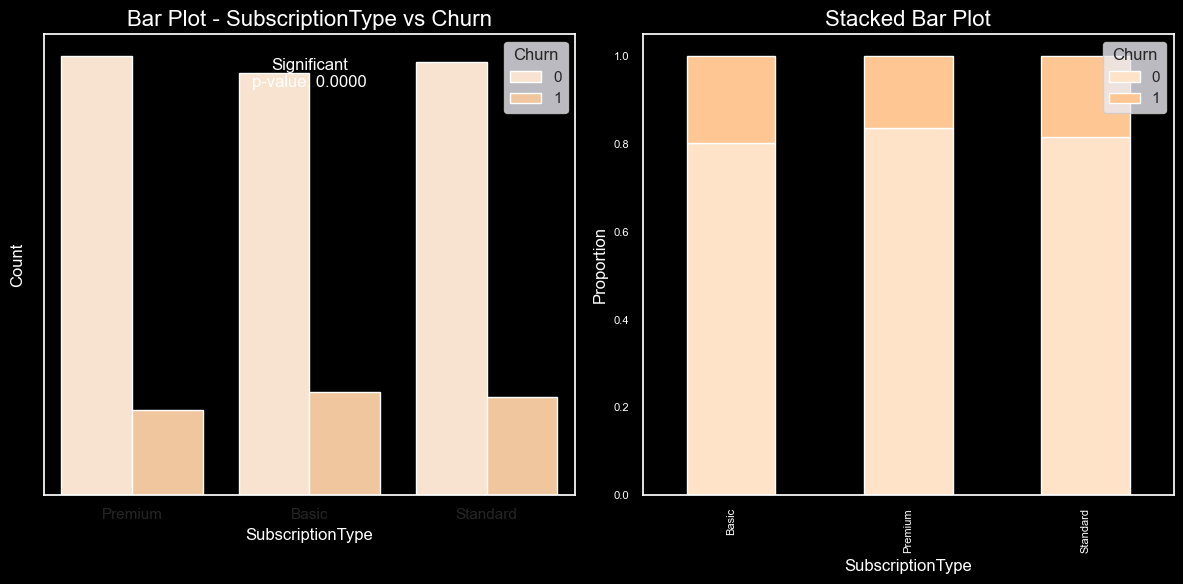

Contingency Table:

Churn                 0      1
SubscriptionType              
Basic             65122  15928
Premium           67662  13155
Standard          66821  15099


Normalized Contingency Table (in %):

Churn                  0       1
SubscriptionType                
Basic             80.35%  19.65%
Premium           83.72%  16.28%
Standard          81.57%  18.43%

Information Value (IV): 0.0006582326601282937


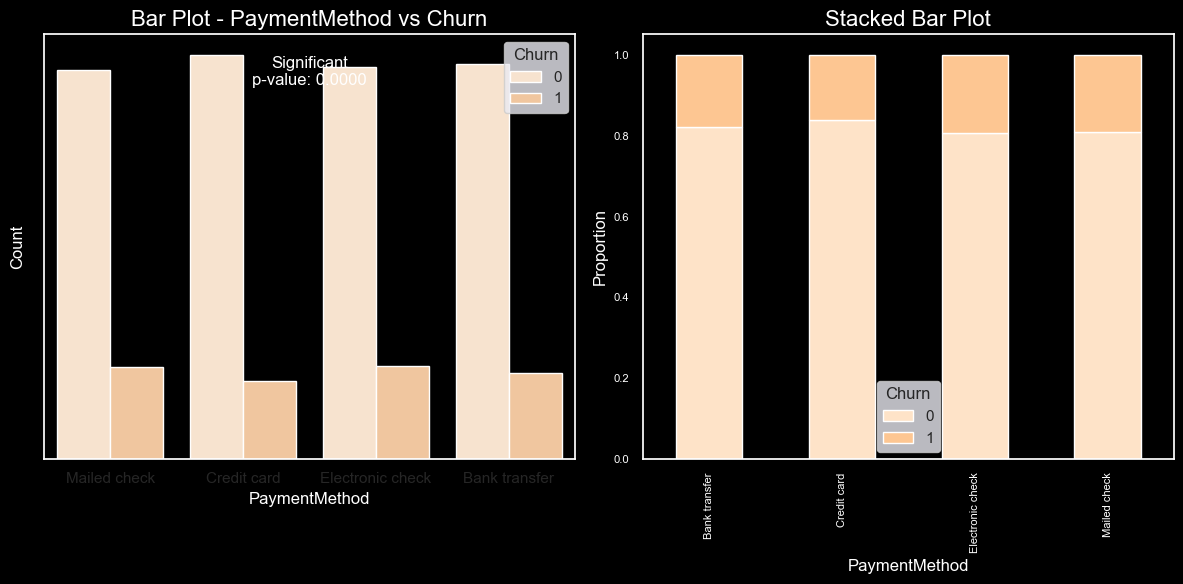

Contingency Table:

Churn                 0      1
PaymentMethod                 
Bank transfer     49898  10899
Credit card       51039   9885
Electronic check  49512  11801
Mailed check      49156  11597


Normalized Contingency Table (in %):

Churn                  0       1
PaymentMethod                   
Bank transfer     82.07%  17.93%
Credit card       83.77%  16.23%
Electronic check  80.75%  19.25%
Mailed check      80.91%  19.09%

Information Value (IV): 0.0004979777231098777


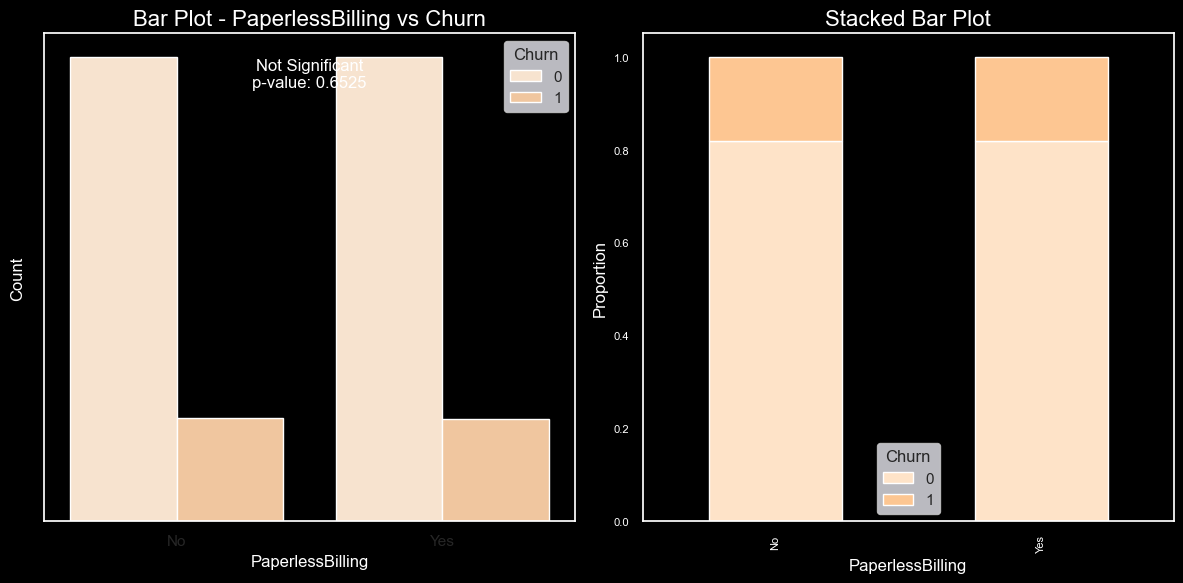

Contingency Table:

Churn                 0      1
PaperlessBilling              
No                99830  22150
Yes               99775  22032


Normalized Contingency Table (in %):

Churn                  0       1
PaperlessBilling                
No                81.84%  18.16%
Yes               81.91%  18.09%

Information Value (IV): 4.2565693899666076e-07


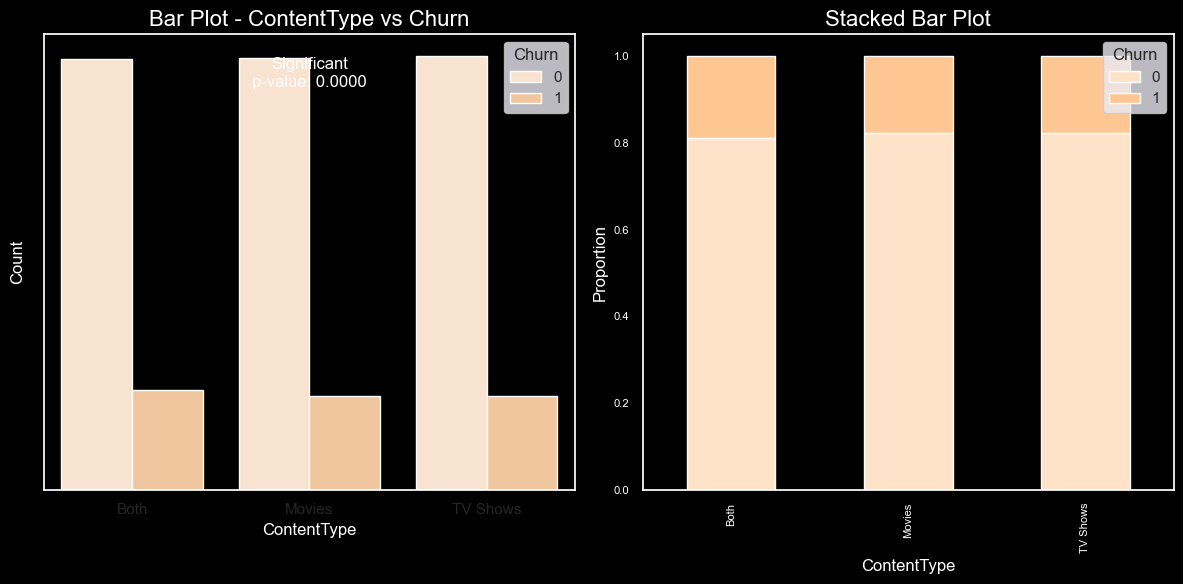

Contingency Table:

Churn            0      1
ContentType              
Both         66332  15405
Movies       66523  14382
TV Shows     66750  14395


Normalized Contingency Table (in %):

Churn             0       1
ContentType                
Both         81.15%  18.85%
Movies       82.22%  17.78%
TV Shows     82.26%  17.74%

Information Value (IV): 8.86809943238104e-05


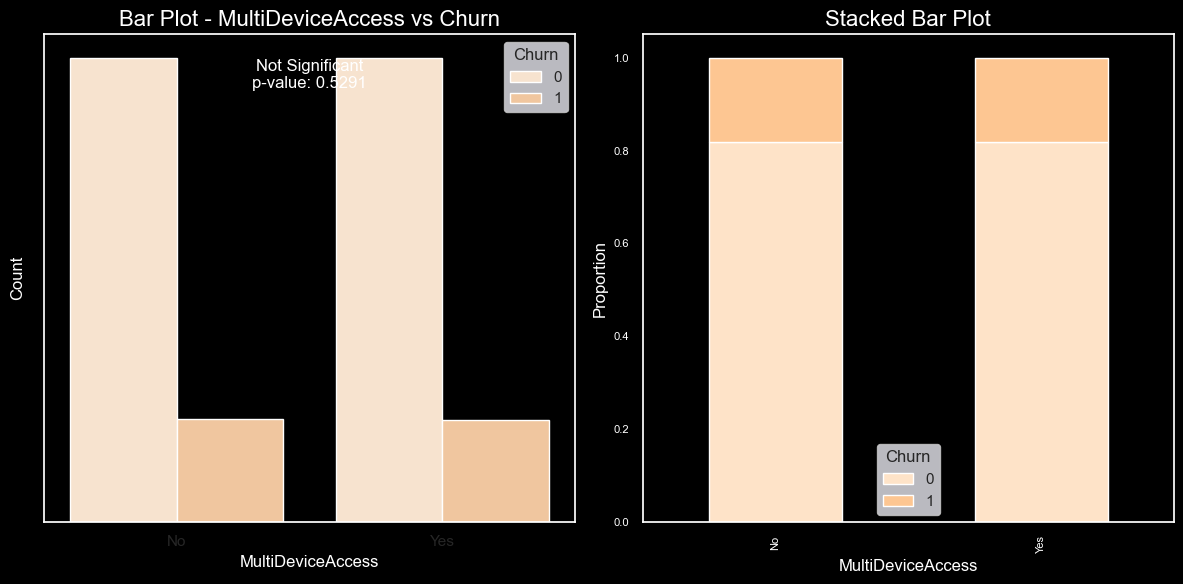

Contingency Table:

Churn                  0      1
MultiDeviceAccess              
No                 99858  22177
Yes                99747  22005


Normalized Contingency Table (in %):

Churn                   0       1
MultiDeviceAccess                
No                 81.83%  18.17%
Yes                81.93%  18.07%

Information Value (IV): 8.261353045330893e-07


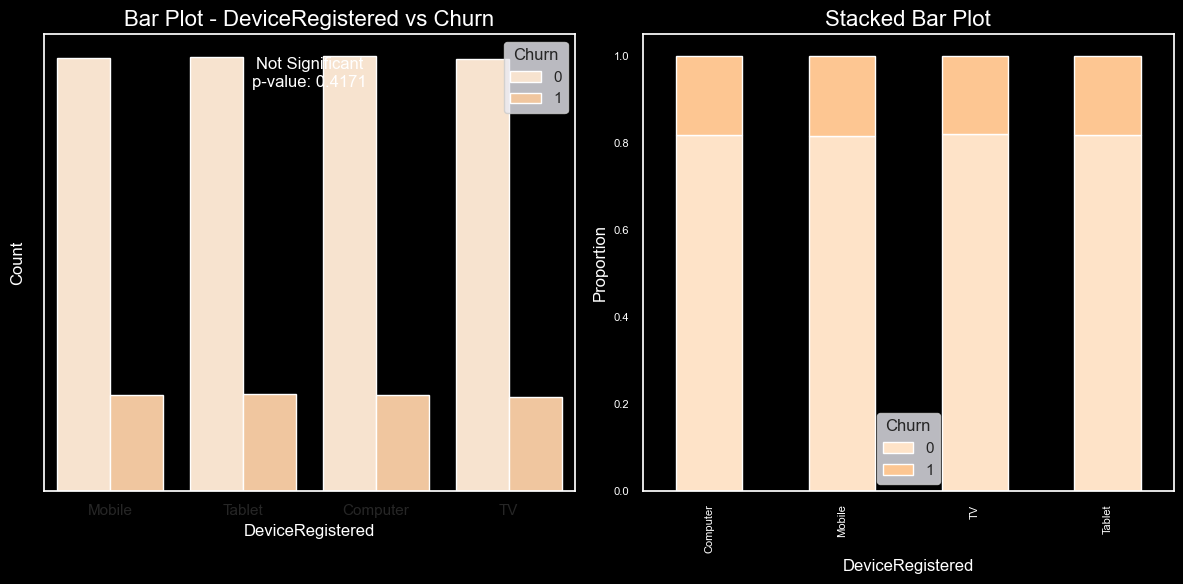

Contingency Table:

Churn                 0      1
DeviceRegistered              
Computer          50058  11089
Mobile            49805  11109
TV                49736  10847
Tablet            50006  11137


Normalized Contingency Table (in %):

Churn                  0       1
DeviceRegistered                
Computer          81.87%  18.13%
Mobile            81.76%  18.24%
TV                82.10%  17.90%
Tablet            81.79%  18.21%

Information Value (IV): 5.8329257055074685e-06


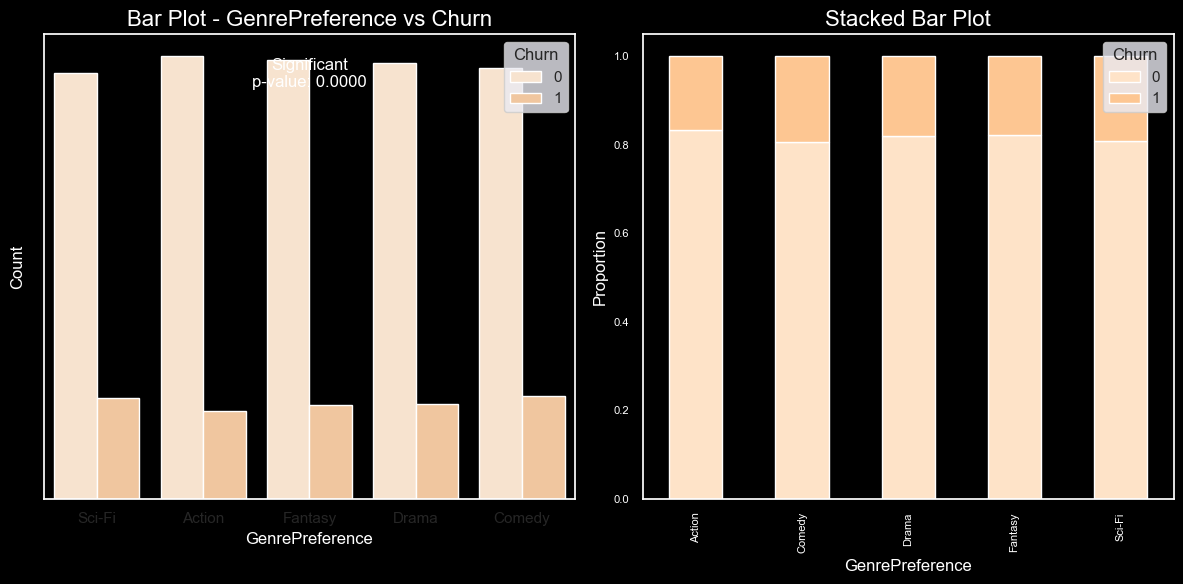

Contingency Table:

Churn                0     1
GenrePreference             
Action           40614  8076
Comedy           39571  9489
Drama            40033  8711
Fantasy          40303  8652
Sci-Fi           39084  9254


Normalized Contingency Table (in %):

Churn                 0       1
GenrePreference                
Action           83.41%  16.59%
Comedy           80.66%  19.34%
Drama            82.13%  17.87%
Fantasy          82.33%  17.67%
Sci-Fi           80.86%  19.14%

Information Value (IV): 0.00034830488087429887


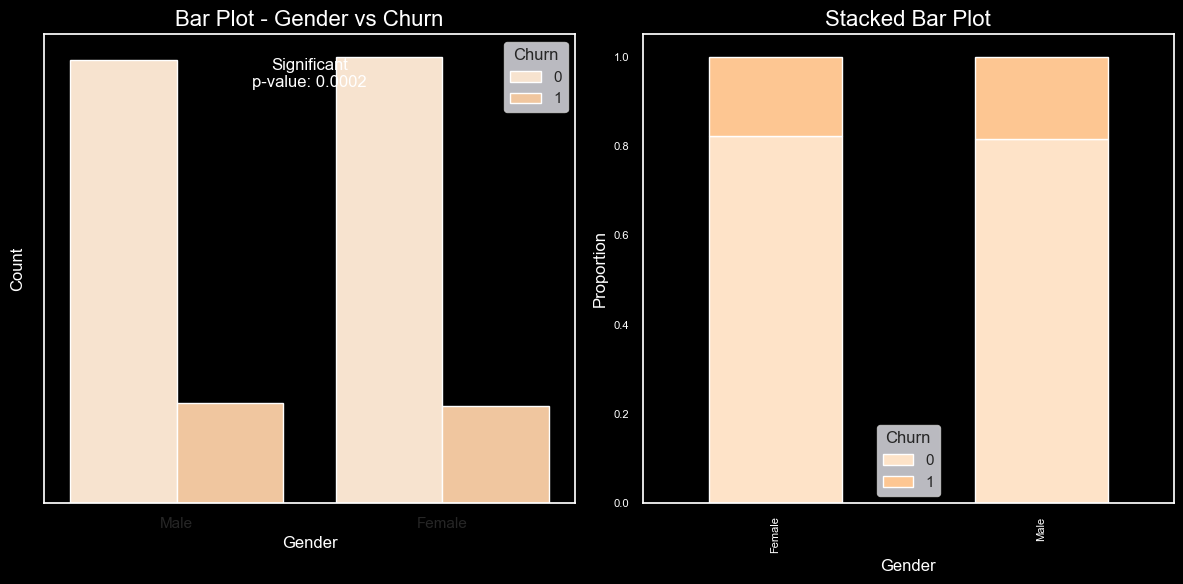

Contingency Table:

Churn        0      1
Gender               
Female  100183  21747
Male     99422  22435


Normalized Contingency Table (in %):

Churn        0       1
Gender                
Female  82.16%  17.84%
Male    81.59%  18.41%

Information Value (IV): 2.787970477601898e-05


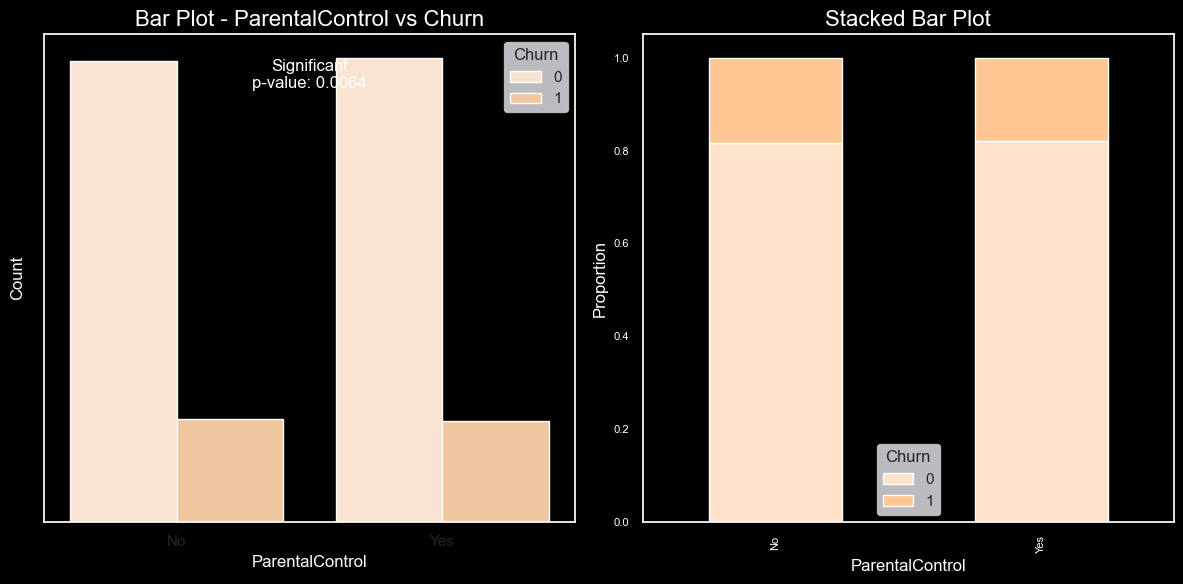

Contingency Table:

Churn                 0      1
ParentalControl               
No                99386  22316
Yes              100219  21866


Normalized Contingency Table (in %):

Churn                 0       1
ParentalControl                
No               81.66%  18.34%
Yes              82.09%  17.91%

Information Value (IV): 1.5296149068903635e-05


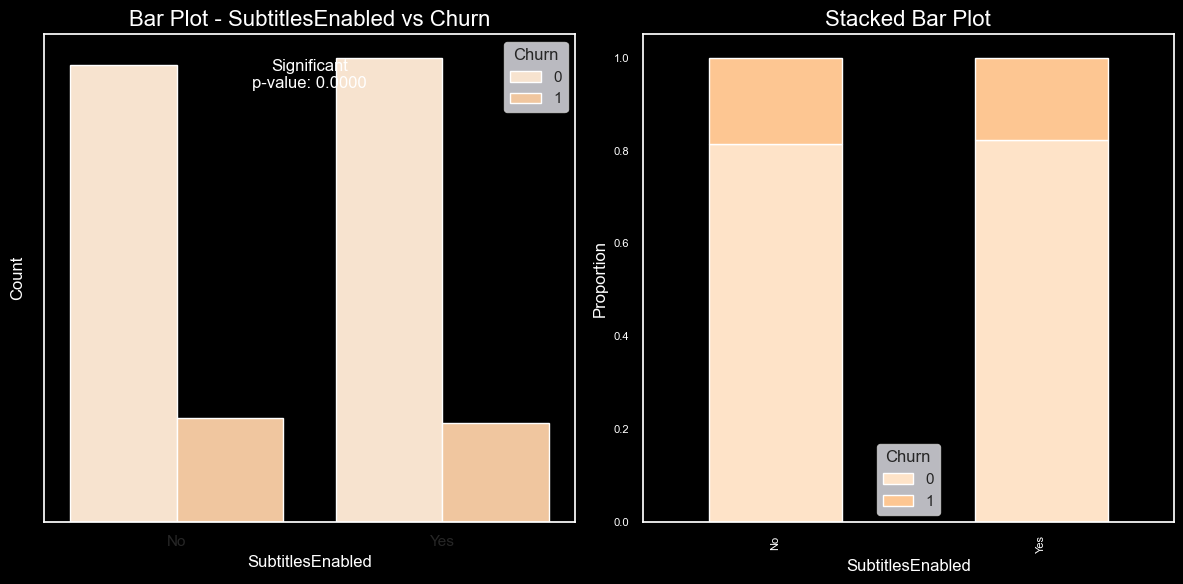

Contingency Table:

Churn                  0      1
SubtitlesEnabled               
No                 98987  22620
Yes               100618  21562


Normalized Contingency Table (in %):

Churn                  0       1
SubtitlesEnabled                
No                81.40%  18.60%
Yes               82.35%  17.65%

Information Value (IV): 7.653854310628273e-05


[None, None, None, None, None, None, None, None, None, None]

In [18]:
[plot_categorical_vs_categorical(train_df,i,'Churn') for i in categorical]

In [19]:
percentiles=[0,10,20,30,40,50,60,70,80,90,100]

bin_edges = np.percentile(train_df['AccountAge'].dropna(), percentiles)

print(bin_edges)



[  1.  13.  24.  36.  48.  60.  72.  84.  96. 108. 119.]


In [20]:
bin_edges = [0,13,36,60,84,108,132]
bin_names = ['0-13', '13-36', '36-60', '60-84', '84-108', '108+']
train_df['AccountAgeBin'] = pd.cut(train_df['AccountAge'], bin_edges, labels=bin_names) 

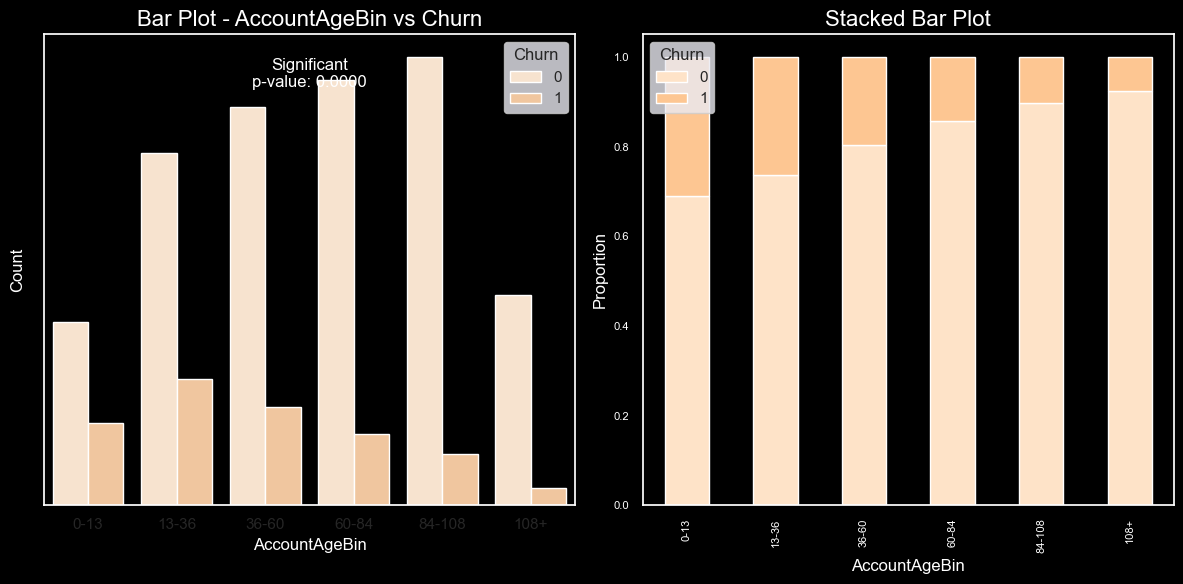

Contingency Table:

Churn              0      1
AccountAgeBin              
0-13           18108   8135
13-36          34849  12467
36-60          39400   9683
60-84          42108   7083
84-108         44378   5082
108+           20762   1732


Normalized Contingency Table (in %):

Churn               0       1
AccountAgeBin                
0-13           69.00%  31.00%
13-36          73.65%  26.35%
36-60          80.27%  19.73%
60-84          85.60%  14.40%
84-108         89.73%  10.27%
108+           92.30%   7.70%

Information Value (IV): 0.019332776381541288


In [21]:
plot_categorical_vs_categorical(train_df,'AccountAgeBin','Churn')

In [22]:
percentiles=[0,10,20,30,40,50,60,70,80,90,100]

bin_edges = np.percentile(train_df['MonthlyCharges'].dropna(), percentiles)

print(bin_edges)

[ 4.99006155  6.47973495  7.9904372   9.48861872 10.99540429 12.49555523
 14.01700524 15.50108579 16.98189296 18.47291963 19.98995687]


In [23]:
bin_edges = [0,5,8,11,14,17,19,25]
bin_names = ['0-5', '5-8', '8-11', '11-14', '14-17', '17-19', '19+']
train_df['MonthlyChargesBin'] = pd.cut(train_df['MonthlyCharges'], bin_edges, labels=bin_names)

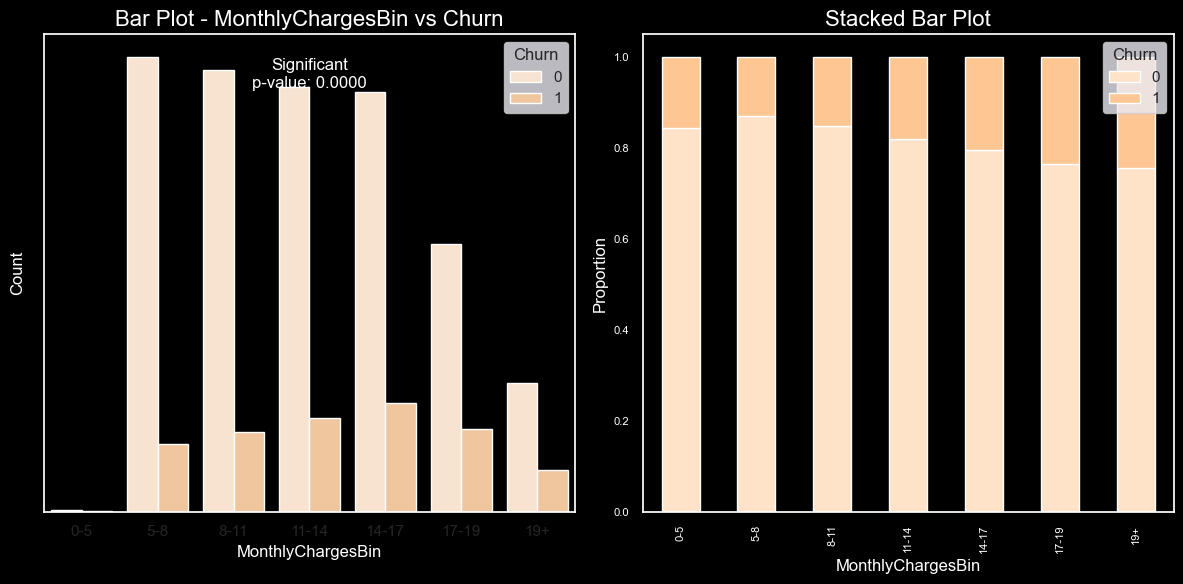

Contingency Table:

Churn                  0      1
MonthlyChargesBin              
0-5                  129     24
5-8                42434   6338
8-11               41252   7423
11-14              39651   8756
14-17              39188  10102
17-19              24975   7689
19+                11976   3850


Normalized Contingency Table (in %):

Churn                   0       1
MonthlyChargesBin                
0-5                84.31%  15.69%
5-8                87.00%  13.00%
8-11               84.75%  15.25%
11-14              81.91%  18.09%
14-17              79.50%  20.50%
17-19              76.46%  23.54%
19+                75.67%  24.33%

Information Value (IV): 0.004893480086612003


In [40]:
plot_categorical_vs_categorical(train_df,'MonthlyChargesBin','Churn')

In [41]:
percentiles=[0,10,20,30,40,50,60,70,80,90,100]

bin_edges = np.percentile(train_df['TotalCharges'].dropna(), percentiles)

print(bin_edges)

[   4.99115435  136.05288257  264.92108842  392.9789194   520.53283891
  649.87848709  801.1555651   982.2140436  1211.18535627 1528.94607939
 2378.72384411]


In [42]:
bin_edges = [0,5,140,395,650,985,1530,2400]
bin_names = ['0-5', '5-140', '140-395', '395-650', '650-985', '985-1530', '1530+']
train_df['TotalChargesBin'] = pd.cut(train_df['TotalCharges'], bin_edges, labels=bin_names)

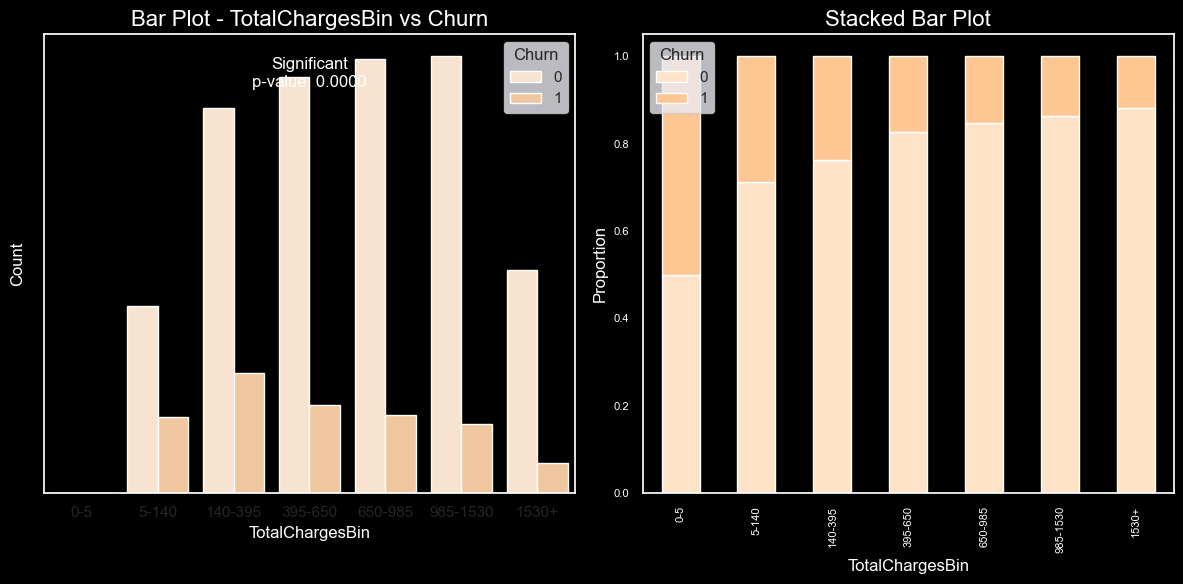

Contingency Table:

Churn                0      1
TotalChargesBin              
0-5                  1      1
5-140            17937   7242
140-395          36915  11477
395-650          39924   8420
650-985          41555   7491
985-1530         41865   6644
1530+            21408   2907


Normalized Contingency Table (in %):

Churn                 0       1
TotalChargesBin                
0-5              50.00%  50.00%
5-140            71.24%  28.76%
140-395          76.28%  23.72%
395-650          82.58%  17.42%
650-985          84.73%  15.27%
985-1530         86.30%  13.70%
1530+            88.04%  11.96%

Information Value (IV): 0.008865436949149236


In [43]:
plot_categorical_vs_categorical(train_df,'TotalChargesBin','Churn')

In [38]:
#one hot encoding

X_one_hot = pd.get_dummies(train_df[categorical], drop_first=True)


In [39]:
X_one_hot.head()

,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,ContentType_Movies,ContentType_TV Shows,MultiDeviceAccess_Yes,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1
4,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0


In [40]:
X=train_df[continuous] # independent variables

X=pd.concat([X,X_one_hot],axis=1)
y=train_df['Churn'] # target variable

In [41]:
from sklearn.model_selection import train_test_split # to split the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # splitting the data

In [44]:
X_train_one_hot=X_train[X_one_hot.columns] # one hot encoded training independent variables
X_test_one_hot=X_test[X_one_hot.columns] # one hot encoded testing independent variables

In [42]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
columns_to_scale=continuous

In [45]:
X_train_scaled=scaling.fit_transform(X_train[columns_to_scale])
X_test_scaled=scaling.transform(X_test[columns_to_scale])

X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=columns_to_scale,index=X_train.index)
X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=columns_to_scale,index=X_test.index)

X_train_scaled=pd.concat([X_train_scaled_df,X_train_one_hot],axis=1)
X_test_scaled=pd.concat([X_test_scaled_df,X_test_one_hot],axis=1)

In [46]:
model_list=[] # list of models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


model_list.append(('Logistic Regression',LogisticRegression()))
model_list.append(('Decision Tree',DecisionTreeClassifier()))
model_list.append(('Random Forest',RandomForestClassifier()))
model_list.append(('Gradient Boosting',GradientBoostingClassifier()))
model_list.append(('XGBoost',XGBClassifier()))
model_list.append(('LightGBM',LGBMClassifier()))
#model_list.append(('CatBoost',CatBoostClassifier()))
model_list.append(('AdaBoost',AdaBoostClassifier()))
model_list.append(('ExtraTrees',ExtraTreesClassifier()))
model_list.append(('KNN',KNeighborsClassifier()))   
#model_list.append(('SVM',SVC()))
model_list.append(('Naive Bayes',GaussianNB()))
model_list.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))
model_list.append(('Quadratic Discriminant Analysis',QuadraticDiscriminantAnalysis()))
model_list.append(('Neural Network',MLPClassifier()))
model_list.append(('Bagging Classifier',BaggingClassifier()))


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

for model_name,model in model_list:
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)

    print(model_name)
    accuracy_train=round(model.score(X_train_scaled,y_train)*100,2) 
    accuracy_test=round(accuracy_score(y_test,y_pred)*100,2)
    precision=round(precision_score(y_test,y_pred)*100,2)   
    recall=round(recall_score(y_test,y_pred)*100,2)
    f1=round(f1_score(y_test,y_pred)*100,2)
    roc_auc=round(roc_auc_score(y_test,y_pred)*100,2)

    print('Accuracy Train:',accuracy_train)
    print('Accuracy Test:',accuracy_test)
    print('Precision:',precision)
    print('Recall:',recall)
    print('F1 Score:',f1)
    print('ROC AUC Score:',roc_auc)


    print('\n')





Logistic Regression
Accuracy Train: 82.38
Accuracy Test: 82.52
Precision: 57.25
Recall: 12.08
F1 Score: 19.95
ROC AUC Score: 55.05


Decision Tree
Accuracy Train: 100.0
Accuracy Test: 72.67
Precision: 26.86
Recall: 29.94
F1 Score: 28.32
ROC AUC Score: 56.01


Random Forest
Accuracy Train: 100.0
Accuracy Test: 82.32
Precision: 56.36
Recall: 8.57
F1 Score: 14.87
ROC AUC Score: 53.55


Gradient Boosting
Accuracy Train: 82.42
Accuracy Test: 82.44
Precision: 57.83
Recall: 9.5
F1 Score: 16.32
ROC AUC Score: 53.99


XGBoost
Accuracy Train: 83.41
Accuracy Test: 82.28
Precision: 53.63
Recall: 12.79
F1 Score: 20.65
ROC AUC Score: 55.18


LightGBM
Accuracy Train: 82.64
Accuracy Test: 82.42
Precision: 56.15
Recall: 11.32
F1 Score: 18.84
ROC AUC Score: 54.69


AdaBoost
Accuracy Train: 82.3
Accuracy Test: 82.43
Precision: 55.32
Recall: 13.07
F1 Score: 21.15
ROC AUC Score: 55.37


ExtraTrees
Accuracy Train: 100.0
Accuracy Test: 82.24
Precision: 58.68
Recall: 5.04
F1 Score: 9.28
ROC AUC Score: 52.13



        AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
66000     1.426390        0.168229      1.317716            -0.317935   
133065   -1.548607        0.644538     -1.230844            -1.242329   
210564    0.347225       -1.060508     -0.347533             0.757185   
156946   -1.461107        0.114706     -1.187039            -0.642901   
125381    1.513890        0.751974      1.933536            -1.404560   
...            ...             ...           ...                  ...   
119879   -1.111107        0.584081     -0.803976             0.766068   
103694    0.201391       -0.208795      0.048308            -1.566607   
131932   -0.702774        0.363663     -0.467848             0.860769   
146867   -1.461107        0.448806     -1.159441            -1.361456   
121958   -0.936108       -1.704574     -1.161169            -0.528461   

        AverageViewingDuration  ContentDownloadsPerMonth  \
66000                 0.324167                  1.143078   
133

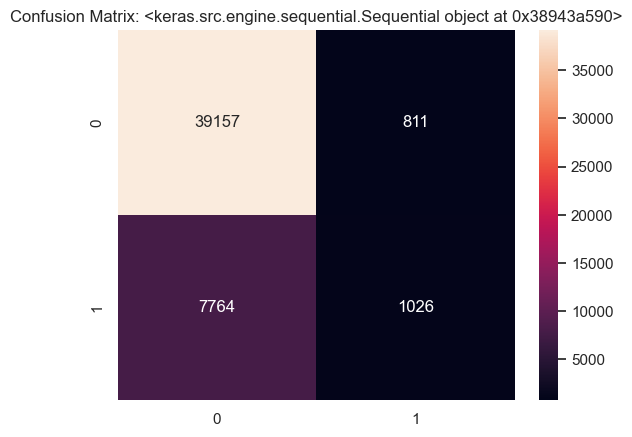

Model : Deep Neural Network
Accuracy score (training): 82.48
Accuracy score (validation): 82.41
Precision score : 55.85
Recall score : 11.67
F1 score : 19.31
1524/1524 [==============================] - 1s 399us/step
[0.05838515 0.7056497  0.09053858 ... 0.15286271 0.25893757 0.10001231]


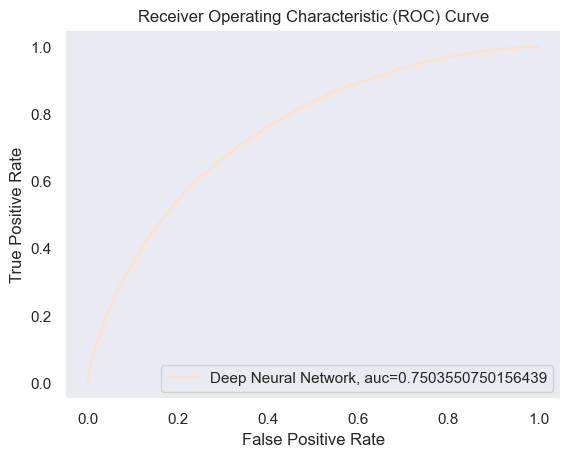

ROC AUC score: 75.04


In [48]:
import tensorflow as tf
from tensorflow import keras


X_train_array = X_train_scaled
X_test_array = X_test_scaled
print(X_train_array)


model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_array.shape[-1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(X_train_array, y_train, epochs=5, batch_size=1000, verbose=1)  

y_pred_dnn = model.predict(X_test_array)

y_pred_dnn = np.round(y_pred_dnn)

#plotting the confusion matrix

from sklearn.metrics import confusion_matrix

cm_dnn = confusion_matrix(y_test, y_pred_dnn)

sns.heatmap(cm_dnn, annot=True, fmt="d")
plt.title(f"Confusion Matrix: {model}")

plt.show()

#accuracy score

accuracy_train_dnn = round(model.evaluate(X_train_array, y_train, verbose=0)[1] * 100, 2)
accuracy_test_dnn = round(accuracy_score(y_test, y_pred_dnn) * 100, 2)
precision_test_dnn = round(precision_score(y_test, y_pred_dnn) * 100, 2)

recall_test_dnn = round(recall_score(y_test, y_pred_dnn) * 100, 2)

f1_score_test_dnn = round(f1_score(y_test, y_pred_dnn) * 100, 2)

print("Model : Deep Neural Network")

print("Accuracy score (training):",accuracy_train_dnn)
print("Accuracy score (validation):",accuracy_test_dnn)
print("Precision score :",precision_test_dnn)
print("Recall score :",recall_test_dnn)
print("F1 score :",f1_score_test_dnn)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba_dnn = model.predict(X_test_array)
y_pred_proba_dnn = y_pred_proba_dnn.flatten()

print(y_pred_proba_dnn)

fpr_dnn, tpr_dnn, _ = roc_curve(y_test, y_pred_proba_dnn)

auc_dnn = roc_auc_score(y_test, y_pred_proba_dnn)

plt.plot(fpr_dnn, tpr_dnn, label="Deep Neural Network, auc=" + str(auc_dnn))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

print("ROC AUC score:", round(auc_dnn * 100, 2))
